# K-Means Clustering: Complete Theory and Concepts


---

## 1. What is K-Means Clustering? {#what-is-kmeans}

### The Big Picture

Imagine you have a box of mixed candies and you want to sort them into groups based on their characteristics (color, size, flavor). You don't know beforehand how many types there are, but you want to group similar candies together. This is essentially what **K-Means clustering** does with data.

**K-Means** is an **unsupervised machine learning** algorithm that partitions data into **k clusters**, where k is a number you specify beforehand. It groups data points that are similar to each other and separates those that are different.

### Key Characteristics

**Unsupervised Learning**: Unlike supervised learning (where you have labels), clustering works with unlabeled data. You don't know the "correct" answer - you're discovering hidden patterns.

**Partitional Clustering**: K-means creates non-overlapping clusters. Each data point belongs to exactly one cluster.

**Centroid-Based**: Each cluster is represented by its center point (centroid), and points are assigned to the nearest center.

### Real-World Applications

**Customer Segmentation**:
- Group customers by purchasing behavior
- Target different marketing strategies to each segment
- Example: Budget shoppers, luxury buyers, occasional purchasers

**Image Compression**:
- Reduce colors in an image by clustering similar colors
- Replace each color with its cluster center
- Significantly reduce file size while maintaining visual quality

**Market Research**:
- Group survey responses to identify market segments
- Understand different consumer preferences
- Develop targeted products for each segment

**Gene Sequencing**:
- Group genes with similar expression patterns
- Identify genes that work together
- Understand biological functions

**Social Network Analysis**:
- Find communities within social networks
- Group users with similar interests or connections
- Recommend friends or content

---

## 2. Understanding the Clustering Problem {#understanding-clustering}

### What Makes a Good Clustering?

**High Intra-cluster Similarity**: Points within the same cluster should be very similar to each other. Like grouping all red candies together.

**Low Inter-cluster Similarity**: Points in different clusters should be very different from each other. Red candies should be clearly different from blue candies.

**Intuitive and Meaningful**: The clusters should make sense for your problem. If you're clustering customers, the groups should correspond to meaningful customer types.

### The Challenge of Unsupervised Learning

Unlike supervised learning where you have a target to predict, clustering has no "ground truth." This creates several challenges:

**No Clear Success Metric**: How do you know if your clustering is "good"? There's no accuracy score like in classification.

**Subjective Interpretation**: The same data might be clustered differently depending on the goal. Customer data could be clustered by age, income, or purchasing behavior.

**Parameter Selection**: You need to choose the number of clusters (k) without knowing the "correct" answer.

### Types of Data Suitable for K-Means

**Numerical/Continuous Data**: K-means works best with numerical features like height, weight, income, temperature.

**Spherical Clusters**: K-means assumes clusters are roughly circular/spherical. It struggles with elongated or irregularly shaped clusters.

**Similar Cluster Sizes**: Works best when clusters have roughly similar numbers of points.

**Similar Variances**: Assumes all features have similar scales and variances.

### Examples of Good vs Bad Data for K-Means

**Good Examples**:
- Customer data: age, income, spending amount
- Physical measurements: height, weight, blood pressure
- Academic performance: test scores across different subjects

**Challenging Examples**:
- Text data (needs preprocessing)
- Categorical data (male/female, red/blue/green)
- Data with very different scales (age in years vs income in dollars)
- Elongated or crescent-shaped natural clusters

---

## 3. How K-Means Works - Step by Step {#how-kmeans-works}

### The K-Means Process (Simple Version)

Think of K-means like organizing a party where you want to arrange tables for guests:

**Step 1: Decide on Number of Tables (Choose k)**
- You decide you want 3 tables for your party
- This is like choosing k=3 for clustering

**Step 2: Place Tables Randomly (Initialize Centroids)**
- You randomly place 3 tables around the room
- These are your initial cluster centers

**Step 3: Assign Guests to Nearest Table (Assignment Step)**
- Each guest sits at the table closest to them
- This creates 3 groups of guests

**Step 4: Move Tables to Center of Groups (Update Step)**
- You move each table to the center of the guests sitting there
- This minimizes the total distance guests have to reach their table

**Step 5: Repeat Until Stable**
- Some guests might now be closer to a different table
- Reassign guests and move tables again
- Continue until no one changes tables

### Detailed Algorithm Steps

**Initialization**:
1. Choose the number of clusters (k)
2. Randomly place k centroids in the data space
3. These centroids represent initial cluster centers

**Main Loop** (repeat until convergence):

**Assignment Step**:
- For each data point, calculate distance to all centroids
- Assign each point to the cluster with the nearest centroid
- This creates k groups of points

**Update Step**:
- For each cluster, calculate the mean (centroid) of all points in that cluster
- Move the centroid to this new mean position
- This minimizes the total distance within each cluster

**Convergence Check**:
- If centroids stop moving (or move very little), stop
- If maximum iterations reached, stop
- Otherwise, repeat assignment and update steps

### Visual Example - Clustering Students

**Data**: Students with features [Study Hours, Sleep Hours]
- Alice: [8, 6], Bob: [2, 9], Carol: [7, 7], David: [1, 8], Eve: [9, 5]

**Goal**: Group into k=2 clusters (maybe "Studious" vs "Relaxed" students)

**Step 1**: Randomly place 2 centroids
- Centroid 1: [3, 4]
- Centroid 2: [6, 8]

**Step 2**: Assign students to nearest centroid
- Alice [8,6]: Distance to C1=√((8-3)²+(6-4)²)=√29=5.4, Distance to C2=√((8-6)²+(6-8)²)=√8=2.8 → Cluster 2
- Bob [2,9]: Distance to C1=√((2-3)²+(9-4)²)=√26=5.1, Distance to C2=√((2-6)²+(9-8)²)=√17=4.1 → Cluster 2
- Continue for all students...

**Step 3**: Update centroids to mean of assigned points
- Calculate new positions based on assigned students
- Move centroids to these new positions

**Step 4**: Repeat until stable

### Why This Works

**Minimizes Within-Cluster Variance**: By moving centroids to the mean, we minimize the sum of squared distances within each cluster.

**Iterative Improvement**: Each step reduces the total clustering cost (sum of squared distances).

**Guaranteed Convergence**: The algorithm will always converge to a local optimum (though not necessarily global optimum).

---

## 4. Mathematical Foundation {#mathematical-foundation}

### The Objective Function

K-means aims to minimize the **Within-Cluster Sum of Squares (WCSS)**:

```
WCSS = Σ(i=1 to k) Σ(x in Cluster i) ||x - μᵢ||²
```

Where:
- k = number of clusters
- x = data point
- μᵢ = centroid of cluster i
- ||x - μᵢ||² = squared Euclidean distance

**In Plain English**: "Minimize the total of all squared distances from each point to its cluster center."

### Why Squared Distances?

**Mathematical Convenience**: Squared distances are easier to work with mathematically (differentiable, no square roots).

**Penalizes Outliers**: Squared distances heavily penalize points far from their cluster center, encouraging tight clusters.

**Connects to Variance**: Minimizing squared distances is equivalent to minimizing variance within clusters.

### The Centroid Update Formula

The optimal centroid for a cluster is the arithmetic mean:

```
μᵢ = (1/|Cᵢ|) Σ(x in Cᵢ) x
```

Where:
- |Cᵢ| = number of points in cluster i
- Cᵢ = set of points in cluster i

**Why This Works**: The mean minimizes the sum of squared distances to all points in the cluster. This is a well-known property from statistics.

### Distance Metrics

**Euclidean Distance** (most common):
```
d(x, y) = √(Σ(xᵢ - yᵢ)²)
```

**Manhattan Distance**:
```
d(x, y) = Σ|xᵢ - yᵢ|
```

**Cosine Distance** (for high-dimensional data):
```
d(x, y) = 1 - (x·y)/(||x||·||y||)
```

### Convergence Guarantees

**Local Optimum**: K-means is guaranteed to converge to a local minimum of the WCSS function.

**No Global Optimum Guarantee**: Different initializations can lead to different final clusterings.

**Finite Convergence**: Since there are only finitely many ways to assign points to clusters, the algorithm must eventually stop.

---

## 5. K-Means Algorithm Details {#algorithm-details}

### Detailed Algorithm Pseudocode

```
ALGORITHM: K-Means Clustering

INPUT: 
- Dataset X = {x₁, x₂, ..., xₙ}
- Number of clusters k
- Maximum iterations max_iter
- Convergence tolerance ε

OUTPUT:
- Cluster assignments for each point
- Final centroid positions

1. INITIALIZATION:
   - Randomly select k points as initial centroids μ₁, μ₂, ..., μₖ
   - Set iteration = 0

2. REPEAT:
   a) ASSIGNMENT STEP:
      For each point xᵢ:
         - Calculate distance to each centroid: d(xᵢ, μⱼ) for j=1,2,...,k
         - Assign xᵢ to cluster with nearest centroid: cᵢ = argmin_j d(xᵢ, μⱼ)
   
   b) UPDATE STEP:
      For each cluster j:
         - Calculate new centroid: μⱼ = mean of all points assigned to cluster j
   
   c) CHECK CONVERGENCE:
      - Calculate change in centroids: Δ = Σⱼ ||μⱼ_new - μⱼ_old||
      - If Δ < ε OR iteration >= max_iter: STOP
      - Else: iteration = iteration + 1, continue

3. RETURN cluster assignments and final centroids
```

### Implementation Considerations

**Handling Empty Clusters**:
- Sometimes a cluster might have no points assigned to it
- Solutions: Reinitialize the centroid, assign it to the farthest point, or reduce k

**Numerical Stability**:
- Use stable algorithms for calculating means
- Handle floating-point precision issues
- Consider using more robust distance calculations

**Memory Efficiency**:
- For large datasets, consider batch processing
- Store only necessary information (distances, assignments)
- Use efficient data structures

### Common Implementation Tricks

**Early Stopping**:
- Stop if assignments don't change between iterations
- Stop if centroid movement is below threshold
- Stop if cost improvement is negligible

**Smart Initialization**:
- Use K-means++ initialization (discussed later)
- Try multiple random initializations and pick the best
- Use domain knowledge for initial centroids

**Vectorization**:
- Use matrix operations instead of loops
- Calculate all distances simultaneously
- Leverage optimized linear algebra libraries

---

## 6. Choosing the Right Number of Clusters (K) {#choosing-k}

### The K Selection Problem

**The Fundamental Challenge**: K-means requires you to specify k (number of clusters) beforehand, but you usually don't know the "correct" number of clusters in your data.

**Why This Matters**: 
- Too few clusters: Important patterns get merged together
- Too many clusters: Natural groups get artificially split
- The choice of k dramatically affects results and interpretation

### The Elbow Method

**Basic Idea**: Plot the cost (WCSS) for different values of k and look for an "elbow" where the cost reduction slows down.

**How It Works**:
1. Run K-means for k = 1, 2, 3, ..., max_k
2. Calculate WCSS for each k
3. Plot WCSS vs k
4. Look for the point where the curve "bends" (forms an elbow)

**Why It Works**:
- As k increases, WCSS always decreases (more clusters = lower cost)
- The rate of decrease slows down after the "natural" number of clusters
- The elbow represents the point of diminishing returns

**Limitations**:
- Elbow isn't always clear or well-defined
- Subjective interpretation of where the "elbow" is
- May not work well with overlapping or irregular clusters

### The Silhouette Method

**Basic Idea**: Measure how well each point fits in its assigned cluster compared to other clusters.

**Silhouette Score for a Point**:
```
s(i) = (b(i) - a(i)) / max(a(i), b(i))
```
Where:
- a(i) = average distance to other points in the same cluster
- b(i) = average distance to points in the nearest different cluster

**Interpretation**:
- s(i) close to +1: Point is well-matched to its cluster
- s(i) close to 0: Point is on the border between clusters  
- s(i) close to -1: Point might be in the wrong cluster

**How to Use**:
1. Calculate average silhouette score for each k
2. Choose k with the highest average silhouette score
3. Also examine the distribution of individual silhouette scores

**Advantages**:
- More objective than elbow method
- Considers both cohesion and separation
- Provides insight into cluster quality

### Gap Statistic

**Basic Idea**: Compare the cost of your clustering to the cost of clustering random data.

**How It Works**:
1. Cluster your actual data with k clusters
2. Generate random data with same properties (same range, distribution)
3. Cluster the random data with k clusters
4. Compare the costs: Gap(k) = log(Cost_random) - log(Cost_actual)
5. Choose k where Gap(k) is largest

**Why It Works**:
- Random data has no natural clusters
- If your data has k natural clusters, the difference should be maximized at k
- Provides a statistical foundation for cluster validation

### Domain Knowledge and Business Constraints

**Use Your Understanding**:
- How many customer segments make sense for marketing?
- What number of product categories would be useful?
- Are there natural groupings you expect to find?

**Business Constraints**:
- Can you effectively manage k different strategies?
- Do you have resources to serve k different segments?
- What number of clusters provides actionable insights?

### Multiple Approaches Strategy

**Best Practice**: Use multiple methods and look for consensus:
1. Try elbow method for rough estimate
2. Use silhouette analysis for refinement
3. Consider domain knowledge and constraints
4. Validate results with business stakeholders

**Example Decision Process**:
- Elbow method suggests k=3 or k=4
- Silhouette analysis favors k=3
- Business team can manage 3 customer segments
- **Decision**: Use k=3

---

## 7. Distance Metrics and Their Impact {#distance-metrics}

### Why Distance Metrics Matter

**Core of K-Means**: The entire algorithm is based on finding the "nearest" centroid, so how you measure "nearness" fundamentally shapes your results.

**Different Metrics, Different Clusters**: The same data can produce completely different clusterings depending on the distance metric used.

**Feature Importance**: Distance metrics implicitly weight the importance of different features.

### Euclidean Distance (Default)

**Formula**: 
```
d(x, y) = √(Σᵢ(xᵢ - yᵢ)²)
```

**When to Use**:
- Features are continuous and numerical
- All features have similar scales and importance
- You want to penalize outliers (squared terms)
- Clusters are expected to be roughly spherical

**Example**: Customer data with [Age, Income] where both are equally important for segmentation.

**Limitations**:
- Sensitive to feature scaling (income in dollars vs age in years)
- Assumes all dimensions are equally important
- Poor performance with high-dimensional data ("curse of dimensionality")

### Manhattan Distance

**Formula**:
```
d(x, y) = Σᵢ|xᵢ - yᵢ|
```

**When to Use**:
- Features represent counts or ratings
- You want to be less sensitive to outliers
- Working with grid-like data (city blocks, pixel coordinates)

**Example**: Product ratings data where you care about total rating differences across categories.

**Characteristics**:
- More robust to outliers than Euclidean
- Creates diamond-shaped rather than circular clusters
- Better for high-dimensional sparse data

### Cosine Distance

**Formula**:
```
d(x, y) = 1 - (x·y)/(||x||·||y||)
```

**When to Use**:
- High-dimensional data (text, gene expression)
- You care about direction/pattern rather than magnitude
- Features represent frequencies or proportions

**Example**: Document clustering where you care about word usage patterns, not document length.

**Characteristics**:
- Ignores vector magnitude, focuses on direction
- Values between 0 and 2
- Excellent for sparse, high-dimensional data

### Feature Scaling and Its Impact

**The Problem**: Different features have different scales
- Age: 18-80 (range of ~60)
- Income: $20,000-$200,000 (range of ~180,000)
- Without scaling, income dominates the distance calculation

**Solutions**:

**Min-Max Scaling** (Normalization):
```
x_scaled = (x - min) / (max - min)
```
- Scales all features to [0, 1]
- Preserves relationships and distributions

**Z-Score Standardization**:
```
x_scaled = (x - mean) / std
```
- Centers data at 0 with unit variance
- Better for normally distributed data

**Robust Scaling**:
```
x_scaled = (x - median) / IQR
```
- Uses median and interquartile range
- Less sensitive to outliers

### Choosing the Right Distance Metric

**Consider Your Data Type**:
- **Continuous numerical**: Euclidean (with scaling)
- **Count/rating data**: Manhattan
- **High-dimensional sparse**: Cosine
- **Mixed types**: Custom weighted distances

**Consider Your Goal**:
- **Minimize total variation**: Euclidean
- **Robust to outliers**: Manhattan
- **Pattern matching**: Cosine
- **Domain-specific needs**: Custom metrics

**Example Scenarios**:

**Customer Segmentation**:
- Features: [Age, Income, Spending, Family_Size]
- Use: Euclidean with standardization
- Rationale: All features are meaningful quantities

**Text Document Clustering**:
- Features: Word frequencies (thousands of dimensions)
- Use: Cosine distance
- Rationale: Document length shouldn't matter, only word patterns

**Product Recommendation**:
- Features: User ratings [1-5] across product categories
- Use: Manhattan distance
- Rationale: Robust to extreme ratings, treats all categories equally

---

## 8. Initialization Methods {#initialization-methods}

### Why Initialization Matters

**Local Optima Problem**: K-means only finds a local minimum, not necessarily the global optimum. Different starting points can lead to very different final clusterings.

**Impact on Results**:
- Poor initialization can lead to suboptimal clusters
- Some clusters might end up empty
- Final cost can be much higher than optimal

**Repeatability**: Random initialization means results change between runs, making it hard to reproduce results.

### Random Initialization (Naive Approach)

**Method**: Randomly select k data points as initial centroids.

**Problems**:
- Centroids might be close together
- May not represent data distribution well
- High variance in results across runs
- Can lead to poor convergence

**When It's Okay**:
- Very well-separated, obvious clusters
- Data is uniformly distributed
- You're running multiple trials anyway

### K-Means++ Initialization

**The Problem**: Random initialization often places centroids close together, leading to poor clustering.

**The Solution**: Choose centroids that are far apart from each other.

**Algorithm**:
1. Choose first centroid randomly from data points
2. For each remaining centroid:
   - Calculate distance from each point to nearest existing centroid
   - Choose next centroid with probability proportional to squared distance
   - This favors points far from existing centroids
3. Repeat until k centroids are chosen

**Why It Works**:
- Ensures centroids are spread out
- Provides theoretical guarantees on clustering quality
- Typically converges faster than random initialization
- More stable results across runs

**Mathematical Insight**:
K-means++ provides an O(log k) approximation to optimal clustering, while random initialization has no such guarantee.

### Multiple Random Runs

**Strategy**: Run K-means multiple times with different random initializations and pick the best result.

**How to Choose "Best"**:
- Lowest WCSS (within-cluster sum of squares)
- Highest silhouette score
- Most stable across multiple runs

**Typical Approach**:
```
best_cost = infinity
best_clustering = None

for i in range(n_trials):
    clustering = kmeans_random_init(data, k)
    cost = calculate_cost(clustering)
    if cost < best_cost:
        best_cost = cost
        best_clustering = clustering

return best_clustering
```

**Trade-offs**:
- **Pros**: Simple, can find better solutions, more robust
- **Cons**: Computationally expensive, no guarantees

### Deterministic Initialization Methods

**Forgy Method**: Randomly assign points to clusters, then calculate initial centroids as cluster means.

**Random Partition**: Randomly partition data into k groups, calculate centroids of each group.

**Grid-Based**: Place centroids at regular intervals across the data space.

**Domain-Specific**: Use knowledge about the problem to place centroids strategically.

### Initialization Best Practices

**For Most Applications**:
1. Use K-means++ as default
2. If results are critical, try multiple K-means++ runs
3. Consider the computational budget vs. quality trade-off

**For Research/Critical Applications**:
1. Try multiple initialization methods
2. Run multiple trials of each method
3. Use statistical tests to compare stability
4. Report initialization method in results

**For Production Systems**:
1. Use K-means++ for consistency
2. Consider caching good initializations
3. Monitor clustering quality over time
4. Have fallback strategies for poor clusterings

**Example Decision Tree**:
```
If computational time is unlimited:
    Use multiple K-means++ runs
Else if moderate time available:
    Use single K-means++ run
Else if minimal time available:
    Use random initialization with multiple quick runs
```

---

## 9. Convergence and Stopping Criteria {#convergence}

### What Does Convergence Mean?

**Mathematical Convergence**: The algorithm reaches a point where further iterations don't improve the objective function (WCSS).

**Practical Convergence**: Changes between iterations become so small that they're not meaningful for practical purposes.

**Perfect Convergence**: Centroids stop moving and point assignments don't change.

### Types of Stopping Criteria

**Centroid Movement Threshold**:
```
max_change = max(||μᵢ_new - μᵢ_old|| for all centroids i)
if max_change < ε: STOP
```
- **Pros**: Directly measures algorithm progress
- **Cons**: May stop too early if centroids move slowly

**Assignment Stability**:
```
if point assignments unchanged: STOP
```
- **Pros**: Guarantees true convergence
- **Cons**: May take many iterations for large datasets

**Cost Change Threshold**:
```
cost_change = |WCSS_new - WCSS_old| / WCSS_old
if cost_change < ε: STOP
```
- **Pros**: Measures improvement in objective function
- **Cons**: Relative vs absolute thresholds can be tricky

**Maximum Iterations**:
```
if iteration >= max_iter: STOP
```
- **Pros**: Guarantees termination, controls computational cost
- **Cons**: May stop before true convergence

### Practical Convergence Strategies

**Multi-Criteria Stopping**:
```python
def should_stop(centroids_old, centroids_new, assignments_old, assignments_new, 
                cost_old, cost_new, iteration, max_iter, tolerance):
    
    # Check maximum iterations
    if iteration >= max_iter:
        return True, "Max iterations reached"
    
    # Check assignment stability
    if np.array_equal(assignments_old, assignments_new):
        return True, "Assignments converged"
    
    # Check centroid movement
    max_movement = max(np.linalg.norm(c_new - c_old) 
                      for c_new, c_old in zip(centroids_new, centroids_old))
    if max_movement < tolerance:
        return True, "Centroids converged"
    
    # Check cost improvement
    cost_change = abs(cost_new - cost_old) / cost_old
    if cost_change < tolerance:
        return True, "Cost converged"
    
    return False, "Continue"
```

### Convergence Speed Factors

**Data Characteristics**:
- **Well-separated clusters**: Fast convergence
- **Overlapping clusters**: Slow convergence
- **Outliers**: Can slow convergence significantly
- **High dimensionality**: Often slower convergence

**Algorithm Parameters**:
- **Good initialization**: Faster convergence (K-means++)
- **Appropriate k**: Right number of clusters converges faster
- **Tolerance settings**: Looser tolerance = faster stopping

**Implementation Details**:
- **Efficient distance calculations**: Use vectorized operations
- **Smart data structures**: Avoid redundant calculations
- **Parallel processing**: Multiple cores for large datasets

### Diagnosing Convergence Issues

**Oscillating Centroids**:
- **Symptom**: Centroids keep moving back and forth
- **Cause**: Points on cluster boundaries switching assignments
- **Solution**: Tighter tolerance, check for outliers

**Very Slow Convergence**:
- **Symptom**: Many iterations with tiny improvements
- **Cause**: Poor initialization, inappropriate k, noisy data
- **Solution**: Better initialization, data preprocessing

**Premature Stopping**:
- **Symptom**: Clustering looks obviously wrong
- **Cause**: Tolerance too loose, poor stopping criteria
- **Solution**: Tighter tolerance, multiple criteria

**Non-Convergence**:
- **Symptom**: Never stops improving (very rare)
- **Cause**: Numerical issues, very large dataset
- **Solution**: Maximum iteration limit, check implementation

### Convergence Best Practices

**Set Reasonable Defaults**:
```python
# Typical good defaults
max_iterations = 300
tolerance = 1e-4
```

**Monitor Convergence**:
```python
# Track convergence history
convergence_history = {
    'costs': [],
    'centroid_movements': [],
    'iterations': 0
}
```

**Adaptive Strategies**:
- Start with loose tolerance for fast initial convergence
- Tighten tolerance for final refinement
- Use different criteria for different phases

**Quality Checks**:
- Verify final clustering makes sense
- Check for empty clusters
- Examine cost reduction over iterations
- Compare multiple runs for consistency

---

## 10. Advantages and Limitations {#pros-and-cons}

### Advantages of K-Means

**Simplicity and Interpretability**:
- **Easy to understand**: The algorithm logic is intuitive
- **Clear results**: Each point belongs to exactly one cluster
- **Interpretable centroids**: Cluster centers have clear meaning
- **Example**: Customer segments with clear profiles (young/high-income, old/low-income, etc.)

**Computational Efficiency**:
- **Time complexity**: O(n × k × i × d) where n=points, k=clusters, i=iterations, d=dimensions
- **Space complexity**: O(n × d) for data plus O(k × d) for centroids
- **Scales well**: Can handle large datasets efficiently
- **Parallelizable**: Assignment step can be parallelized easily

**Guaranteed Convergence**:
- **Always terminates**: Finite number of possible assignments
- **Converges to local optimum**: Cost function always decreases
- **Predictable runtime**: Can set maximum iterations

**Wide Applicability**:
- **General purpose**: Works for many types of numerical data
- **Well-established**: Extensive research and optimization
- **Available everywhere**: Implemented in all major ML libraries

### Limitations of K-Means

**Requires Choosing K**:
- **Problem**: Must specify number of clusters beforehand
- **Impact**: Wrong k can lead to meaningless results
- **Example**: Trying to segment customers into 5 groups when there are naturally 3 types
- **Mitigation**: Use elbow method, silhouette analysis, domain knowledge

**Assumes Spherical Clusters**:
- **Problem**: Assumes clusters are roughly circular with similar sizes
- **Impact**: Fails with elongated, irregular, or nested clusters
- **Example**: Geographic data where natural regions follow rivers or mountains
- **Mitigation**: Data transformation, different algorithms (DBSCAN, Gaussian Mixture Models)

**Sensitive to Initialization**:
- **Problem**: Different starting points give different results
- **Impact**: Results may not be reproducible or optimal
- **Example**: Marketing team gets different customer segments each time they run analysis
- **Mitigation**: K-means++, multiple random runs, set random seed

**Sensitive to Scale and Outliers**:
- **Problem**: Features with larger scales dominate distance calculations
- **Impact**: Irrelevant features can drive clustering decisions
- **Example**: Income (thousands) overwhelms age (tens) in customer segmentation
- **Mitigation**: Feature scaling, outlier removal, robust distance metrics

**Poor Performance with Non-Globular Clusters**:
- **Problem**: Struggles with clusters that aren't compact and separated
- **Impact**: May split natural clusters or merge different groups
- **Example**: Text data where topics form complex, overlapping themes
- **Mitigation**: Different algorithms, feature engineering, dimensionality reduction

### When K-Means Works Well

**Ideal Conditions**:
- Clusters are roughly spherical and well-separated
- Features are numerical and properly scaled
- You have some idea of the number of clusters
- Clusters have similar sizes and densities

**Good Application Areas**:

**Customer Segmentation**:
- **Why it works**: Customer features often create natural spherical segments
- **Example**: Demographics, purchasing behavior, engagement metrics

**Image Compression**:
- **Why it works**: Color values in RGB space often cluster naturally
- **Example**: Reducing 256 colors to 16 dominant colors

**Market Research**:
- **Why it works**: Survey responses often create distinct preference groups
- **Example**: Product features preferences, brand attitudes

**Gene Expression Analysis**:
- **Why it works**: Gene expression levels often group by function
- **Example**: Identifying co-expressed gene networks

### When to Consider Alternatives

**Use Hierarchical Clustering When**:
- You want to explore different numbers of clusters
- You need a dendrogram showing cluster relationships
- Dataset is small to medium size
- You want more interpretable cluster relationships

**Use DBSCAN When**:
- Clusters have arbitrary shapes
- You want to identify outliers
- Cluster sizes vary significantly
- You don't know the number of clusters

**Use Gaussian Mixture Models When**:
- Clusters may overlap
- You want probabilistic cluster assignments
- Clusters have different shapes/orientations
- You need uncertainty estimates

**Use Spectral Clustering When**:
- Data lies on manifolds
- Clusters have complex, non-convex shapes
- You have similarity/distance data rather than feature vectors

### Making K-Means More Robust

**Data Preprocessing**:
```python
# Scale features to similar ranges
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Remove outliers
from sklearn.ensemble import IsolationForest
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(data)
data_clean = data[outliers == 1]
```

**Algorithm Modifications**:
```python
# Use K-means++ initialization
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)

# Try multiple runs and pick best
best_kmeans = None
best_score = float('inf')
for _ in range(10):
    kmeans = KMeans(n_clusters=k, init='random')
    kmeans.fit(data)
    if kmeans.inertia_ < best_score:
        best_score = kmeans.inertia_
        best_kmeans = kmeans
```

**Validation and Diagnostics**:
```python
# Check cluster quality
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, labels)

# Visualize results (for 2D data)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           marker='x', s=200, linewidths=3, c='red')
```

---

## 11. Variants of K-Means {#variants}

### K-Means++ (Improved Initialization)

**Problem with Standard K-Means**: Random initialization can lead to poor clustering and slow convergence.

**K-Means++ Solution**: Choose initial centroids that are far apart from each other.

**Key Improvement**: Provides theoretical guarantees (O(log k) approximation) and typically converges faster.

**When to Use**: Almost always - it's a strict improvement over random initialization with minimal computational overhead.

### Mini-Batch K-Means

**Problem**: Standard K-means can be slow for very large datasets because it processes all points in each iteration.

**Solution**: Use random samples (mini-batches) of data in each iteration instead of the full dataset.

**Algorithm**:
1. Select random mini-batch of points
2. Assign points in mini-batch to nearest centroids
3. Update centroids using gradient descent with learning rate
4. Repeat with new mini-batches

**Advantages**:
- Much faster for large datasets
- Lower memory requirements
- Can handle streaming data
- Often produces similar results to standard K-means

**Disadvantages**:
- Less precise than full K-means
- Requires tuning batch size and learning rate
- May converge to slightly different solutions

**When to Use**: 
- Very large datasets (millions of points)
- Memory constraints
- Need for fast approximate clustering
- Streaming/online scenarios

### Fuzzy C-Means (Soft Clustering)

**Problem**: K-means assigns each point to exactly one cluster, but real data often has overlapping clusters.

**Solution**: Allow points to belong to multiple clusters with different membership degrees.

**Key Difference**: Instead of hard assignments (0 or 1), use soft assignments (probabilities between 0 and 1).

**Output**: Membership matrix where entry (i,j) represents how much point i belongs to cluster j.

**Example**: 
- Point might be 70% in cluster A, 30% in cluster B
- Useful for customer segmentation where customers span multiple segments

**Advantages**:
- Handles overlapping clusters naturally
- Provides uncertainty information
- More flexible than hard clustering

**Disadvantages**:
- More complex to interpret
- Computationally more expensive
- Additional parameters to tune (fuzziness parameter)

**When to Use**:
- Overlapping clusters expected
- Need uncertainty quantification
- Customer/market segmentation with overlap

### K-Medoids (PAM - Partitioning Around Medoids)

**Problem**: K-means centroids might not be actual data points and are sensitive to outliers.

**Solution**: Use actual data points as cluster centers (medoids) instead of calculated means.

**Algorithm**:
1. Select k data points as initial medoids
2. Assign each point to nearest medoid
3. For each cluster, try swapping medoid with other points in cluster
4. Keep swap if it reduces total cost
5. Repeat until no beneficial swaps

**Advantages**:
- More robust to outliers
- Medoids are interpretable (actual data points)
- Works with any distance metric
- Handles categorical data better

**Disadvantages**:
- Computationally more expensive O(n²)
- Slower convergence
- May get stuck in local optima more easily

**When to Use**:
- Data has outliers
- Need interpretable cluster centers
- Working with categorical or mixed data
- Custom distance metrics required

### K-Modes and K-Prototypes

**Problem**: K-means only works with numerical data, but real datasets often contain categorical features.

**K-Modes Solution**: Extension for purely categorical data
- Uses mode instead of mean for cluster centers
- Uses simple matching distance instead of Euclidean
- Frequency-based centroid updates

**K-Prototypes Solution**: Extension for mixed numerical and categorical data
- Combines K-means and K-modes
- Separate distance calculations for numerical and categorical features
- Weighted combination of both distance types

**When to Use**:
- Categorical or mixed data types
- Customer segmentation with demographics (age, income) and preferences (brand, category)
- Survey data with ratings and categories

### Spherical K-Means

**Problem**: Standard K-means doesn't work well for directional data or high-dimensional sparse data.

**Solution**: Normalize all vectors to unit length and use cosine similarity instead of Euclidean distance.

**Use Cases**:
- Text document clustering (word frequency vectors)
- Gene expression data
- Web user behavior (page visit patterns)

**Advantages**:
- Better for high-dimensional sparse data
- Focuses on direction rather than magnitude
- Natural for frequency/proportion data

### Kernel K-Means

**Problem**: K-means only finds linearly separable clusters.

**Solution**: Map data to higher-dimensional space using kernel functions, then apply K-means.

**Key Idea**: 
- Transform data using kernel function (RBF, polynomial)
- Apply K-means in transformed space
- Results in non-linear cluster boundaries in original space

**Advantages**:
- Can find non-linearly separable clusters
- Leverages kernel trick from SVM theory
- More flexible cluster shapes

**Disadvantages**:
- Computationally expensive
- Difficult to choose appropriate kernel
- Harder to interpret results

**When to Use**:
- Non-linear cluster boundaries expected
- Sufficient computational resources
- Complex, high-dimensional data

### Choosing the Right Variant

**Decision Framework**:

**For Standard Applications**:
- Use K-means++ as default
- Well-separated, numerical data

**For Large Datasets**:
- Mini-batch K-means
- Computational efficiency is critical

**For Overlapping Clusters**:
- Fuzzy C-means
- Need uncertainty information

**For Robust Clustering**:
- K-medoids
- Data has outliers

**For Categorical Data**:
- K-modes (categorical only)
- K-prototypes (mixed data)

**For High-Dimensional Sparse Data**:
- Spherical K-means
- Text or frequency data

**For Complex Cluster Shapes**:
- Kernel K-means
- Non-linear boundaries expected

---

## 12. When to Use K-Means vs Other Methods {#when-to-use}

### The Clustering Algorithm Landscape

**Partitional vs Hierarchical**:
- **Partitional** (K-means): Creates flat clusters, requires k
- **Hierarchical**: Creates tree of clusters, explores all k values

**Hard vs Soft Clustering**:
- **Hard** (K-means): Each point belongs to one cluster
- **Soft** (Fuzzy C-means, GMM): Points can belong to multiple clusters

**Centroid vs Density-based**:
- **Centroid** (K-means): Clusters around center points
- **Density** (DBSCAN): Clusters based on point density

### K-Means vs Hierarchical Clustering

**Choose K-Means When**:
- You have a good idea of the number of clusters
- Dataset is large (>10,000 points)
- Computational efficiency is important
- Clusters are roughly spherical and well-separated
- You need reproducible results (with proper initialization)

**Choose Hierarchical When**:
- You want to explore different numbers of clusters
- Dataset is small to medium (<5,000 points)
- You need to understand cluster relationships
- You want a visual dendrogram
- Clusters may have hierarchical structure

**Example Scenarios**:

**K-Means**: Customer segmentation for a large e-commerce company
- Know you want 3-5 customer segments for marketing
- Have millions of customers
- Need fast, scalable solution

**Hierarchical**: Analyzing product categories for a catalog
- Want to understand how products relate to each other
- Moderate number of products (~1,000)
- Need to show category relationships to business stakeholders

### K-Means vs DBSCAN

**Choose K-Means When**:
- Clusters are roughly spherical and similar sizes
- You don't expect many outliers
- You have some idea of number of clusters
- All data points should be assigned to clusters

**Choose DBSCAN When**:
- Clusters have arbitrary, irregular shapes
- You expect outliers and want to identify them
- Cluster sizes vary significantly
- You don't know the number of clusters beforehand

**Example Scenarios**:

**K-Means**: Analyzing survey responses on product features
- Responses tend to group around clear preference types
- Want to assign every customer to a segment
- Need specific number of segments for business strategy

**DBSCAN**: Analyzing GPS tracking data to find activity locations
- Activity areas have irregular shapes (buildings, parks)
- GPS noise creates outliers that should be ignored
- Number of activity locations unknown
- Some GPS points don't belong to any location

### K-Means vs Gaussian Mixture Models (GMM)

**Choose K-Means When**:
- Hard cluster assignments are sufficient
- Computational efficiency is important
- Clusters are roughly spherical and similar sizes
- You don't need probability estimates

**Choose GMM When**:
- Clusters may overlap
- You need probabilistic assignments
- Clusters may have different shapes/orientations
- You want to model data distribution
- Need uncertainty estimates

**Example Scenarios**:

**K-Means**: Segmenting retail stores by performance metrics
- Want to assign each store to exactly one performance category
- Clear separation between high/medium/low performers
- Need simple, interpretable segments

**GMM**: Analyzing customer behavior patterns
- Customers may exhibit multiple behavior patterns
- Want to understand probability of each behavior
- Behaviors overlap (e.g., occasional vs regular premium buyers)

### K-Means vs Spectral Clustering

**Choose K-Means When**:
- Data is naturally represented in Euclidean space
- Clusters are convex and well-separated
- Computational efficiency is important
- Standard distance metrics are appropriate

**Choose Spectral Clustering When**:
- Data lies on manifolds or complex structures
- Clusters have non-convex shapes
- You have similarity/affinity data rather than feature vectors
- Willing to trade computational cost for flexibility

**Example Scenarios**:

**K-Means**: Clustering numerical customer features
- Age, income, spending amount naturally form spherical clusters
- Standard Euclidean distance makes sense
- Need fast segmentation for large customer base

**Spectral Clustering**: Analyzing social network communities
- Community structure follows network topology, not Euclidean geometry
- Connections define similarity, not feature similarity
- Community shapes are irregular

### Decision Framework

**Start with K-Means if**:
✓ Numerical features
✓ Roughly spherical clusters expected
✓ Know approximate number of clusters
✓ Need computational efficiency
✓ Want simple, interpretable results

**Consider Alternatives if**:
✗ Categorical or mixed data types → K-modes/K-prototypes
✗ Irregular cluster shapes → DBSCAN, Spectral Clustering
✗ Overlapping clusters → GMM, Fuzzy C-means
✗ Unknown number of clusters → Hierarchical, DBSCAN
✗ Many outliers → K-medoids, DBSCAN
✗ High-dimensional sparse data → Spherical K-means



In [2]:
# K-Means Clustering: Complete Implementation and Analysis
# This notebook implements K-means with detailed examples, comparisons, and analysis

import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import random
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
np.random.seed(42)
random.seed(42)

# =============================================================================
# PART 1: K-MEANS IMPLEMENTATION FROM SCRATCH
# =============================================================================

class KMeansFromScratch:
    """
    K-Means clustering implementation from scratch to understand the algorithm.
    
    This implementation includes:
    - Multiple initialization methods
    - Different distance metrics
    - Comprehensive tracking of algorithm progress
    - Visualization capabilities
    """
    
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4, init='random', random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.init = init
        self.random_state = random_state
        
        # Algorithm tracking
        self.history = {
            'centroids': [],
            'assignments': [],
            'costs': [],
            'iterations': 0
        }
    
    def _initialize_centroids(self, X):
        """Initialize centroids using different methods."""
        n_samples, n_features = X.shape
        
        if self.random_state:
            np.random.seed(self.random_state)
        
        if self.init == 'random':
            # Random initialization: select random points from data
            indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            centroids = X[indices].copy()
            
        elif self.init == 'k-means++':
            # K-means++ initialization
            centroids = []
            
            # Choose first centroid randomly
            first_idx = np.random.choice(n_samples)
            centroids.append(X[first_idx])
            
            # Choose remaining centroids
            for _ in range(1, self.n_clusters):
                # Calculate distances to nearest centroid for each point
                distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
                
                # Choose next centroid with probability proportional to squared distance
                probs = distances / distances.sum()
                cumulative_probs = probs.cumsum()
                r = np.random.rand()
                
                for j, p in enumerate(cumulative_probs):
                    if r < p:
                        break
                
                centroids.append(X[j])
            
            centroids = np.array(centroids)
            
        elif self.init == 'forgy':
            # Forgy method: randomly assign points to clusters, then calculate centroids
            assignments = np.random.choice(self.n_clusters, n_samples)
            centroids = np.array([X[assignments == i].mean(axis=0) if np.any(assignments == i) 
                                 else X[np.random.choice(n_samples)] for i in range(self.n_clusters)])
        
        else:
            raise ValueError(f"Unknown initialization method: {self.init}")
        
        return centroids
    
    def _assign_clusters(self, X, centroids):
        """Assign each point to the nearest centroid."""
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, assignments):
        """Update centroids to the mean of assigned points."""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if np.any(assignments == i):
                centroids[i] = X[assignments == i].mean(axis=0)
            else:
                # Handle empty cluster by reinitializing to random point
                centroids[i] = X[np.random.choice(X.shape[0])]
        return centroids
    
    def _calculate_cost(self, X, centroids, assignments):
        """Calculate within-cluster sum of squares (WCSS)."""
        cost = 0
        for i in range(self.n_clusters):
            cluster_points = X[assignments == i]
            if len(cluster_points) > 0:
                cost += np.sum((cluster_points - centroids[i])**2)
        return cost
    
    def fit(self, X):
        """Fit K-means to the data."""
        # Initialize centroids
        centroids = self._initialize_centroids(X)
        
        # Store initial state
        assignments = self._assign_clusters(X, centroids)
        cost = self._calculate_cost(X, centroids, assignments)
        
        self.history['centroids'].append(centroids.copy())
        self.history['assignments'].append(assignments.copy())
        self.history['costs'].append(cost)
        
        # Main K-means loop
        for iteration in range(self.max_iters):
            # Assignment step
            new_assignments = self._assign_clusters(X, centroids)
            
            # Update step
            new_centroids = self._update_centroids(X, new_assignments)
            
            # Calculate cost
            new_cost = self._calculate_cost(X, new_centroids, new_assignments)
            
            # Store history
            self.history['centroids'].append(new_centroids.copy())
            self.history['assignments'].append(new_assignments.copy())
            self.history['costs'].append(new_cost)
            
            # Check convergence
            centroid_shift = np.max(np.linalg.norm(new_centroids - centroids, axis=1))
            cost_change = abs(new_cost - cost) / max(cost, 1e-10)
            
            if centroid_shift < self.tol or cost_change < self.tol:
                print(f"Converged after {iteration + 1} iterations")
                break
            
            centroids = new_centroids
            cost = new_cost
        
        self.history['iterations'] = iteration + 1
        self.centroids_ = centroids
        self.labels_ = new_assignments
        self.inertia_ = new_cost
        
        return self
    
    def predict(self, X):
        """Predict cluster labels for new data."""
        return self._assign_clusters(X, self.centroids_)
    
    def fit_predict(self, X):
        """Fit the model and return cluster labels."""
        self.fit(X)
        return self.labels_

class KMeansVisualizer:
    """Utility class for visualizing K-means clustering results and progress."""
    
    @staticmethod
    def plot_clustering_result(X, labels, centroids, title="K-Means Clustering Result"):
        """Plot the final clustering result."""
        plt.figure(figsize=(10, 8))
        
        # Plot points colored by cluster
        unique_labels = np.unique(labels)
        colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
        
        for i, color in zip(unique_labels, colors):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                       c=[color], label=f'Cluster {i}', alpha=0.7, s=50)
        
        # Plot centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                   c='black', marker='x', s=200, linewidths=3, label='Centroids')
        
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    @staticmethod
    def plot_algorithm_progress(kmeans_model, X, max_steps=5):
        """Plot the algorithm progress over iterations."""
        history = kmeans_model.history
        n_steps = min(len(history['centroids']), max_steps + 1)
        
        fig, axes = plt.subplots(1, n_steps, figsize=(4*n_steps, 4))
        if n_steps == 1:
            axes = [axes]
        
        for step in range(n_steps):
            ax = axes[step]
            
            centroids = history['centroids'][step]
            assignments = history['assignments'][step]
            cost = history['costs'][step]
            
            # Plot points colored by assignment
            unique_labels = np.unique(assignments)
            colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
            
            for i, color in zip(unique_labels, colors):
                cluster_points = X[assignments == i]
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=[color], alpha=0.7, s=30)
            
            # Plot centroids
            ax.scatter(centroids[:, 0], centroids[:, 1], 
                      c='black', marker='x', s=200, linewidths=3)
            
            ax.set_title(f'Iteration {step}\nCost: {cost:.2f}')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def plot_cost_convergence(kmeans_model):
        """Plot the cost function over iterations."""
        plt.figure(figsize=(10, 6))
        
        costs = kmeans_model.history['costs']
        plt.plot(range(len(costs)), costs, 'b-o', linewidth=2, markersize=6)
        
        plt.title('K-Means Cost Function Convergence')
        plt.xlabel('Iteration')
        plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
        plt.grid(True, alpha=0.3)
        plt.show()

# =============================================================================
# PART 2: CLUSTER VALIDATION METRICS
# =============================================================================

class ClusterValidation:
    """Comprehensive cluster validation metrics and methods."""
    
    @staticmethod
    def elbow_method(X, k_range=range(1, 11), init='k-means++', n_trials=5):
        """
        Perform elbow method to find optimal number of clusters.
        
        Args:
            X: Data to cluster
            k_range: Range of k values to try
            init: Initialization method
            n_trials: Number of trials per k (to get stable results)
        
        Returns:
            dict with k values and corresponding costs
        """
        costs = []
        k_values = list(k_range)
        
        for k in k_values:
            k_costs = []
            for trial in range(n_trials):
                if k == 1:
                    # For k=1, cost is total variance
                    center = X.mean(axis=0)
                    cost = np.sum((X - center)**2)
                else:
                    kmeans = KMeansFromScratch(n_clusters=k, init=init, random_state=trial)
                    kmeans.fit(X)
                    cost = kmeans.inertia_
                k_costs.append(cost)
            
            # Use mean cost across trials
            costs.append(np.mean(k_costs))
        
        return {'k_values': k_values, 'costs': costs}
    
    @staticmethod
    def silhouette_analysis(X, k_range=range(2, 11), init='k-means++', n_trials=5):
        """
        Perform silhouette analysis to find optimal number of clusters.
        
        Returns:
            dict with k values and corresponding silhouette scores
        """
        silhouette_scores = []
        k_values = list(k_range)
        
        for k in k_values:
            k_scores = []
            for trial in range(n_trials):
                kmeans = KMeansFromScratch(n_clusters=k, init=init, random_state=trial)
                labels = kmeans.fit_predict(X)
                
                # Calculate silhouette score
                if len(np.unique(labels)) > 1:  # Need at least 2 clusters
                    score = silhouette_score(X, labels)
                    k_scores.append(score)
            
            if k_scores:
                silhouette_scores.append(np.mean(k_scores))
            else:
                silhouette_scores.append(0)
        
        return {'k_values': k_values, 'scores': silhouette_scores}
    
    @staticmethod
    def plot_validation_curves(elbow_results, silhouette_results):
        """Plot elbow method and silhouette analysis results."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Elbow method plot
        ax1.plot(elbow_results['k_values'], elbow_results['costs'], 'bo-', linewidth=2, markersize=8)
        ax1.set_title('Elbow Method For Optimal k')
        ax1.set_xlabel('Number of clusters (k)')
        ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
        ax1.grid(True, alpha=0.3)
        
        # Add annotation for potential elbow
        costs = elbow_results['costs']
        if len(costs) >= 3:
            # Simple elbow detection: find point with maximum curvature
            second_diff = np.diff(costs, 2)
            if len(second_diff) > 0:
                elbow_idx = np.argmax(second_diff) + 2
                if elbow_idx < len(elbow_results['k_values']):
                    elbow_k = elbow_results['k_values'][elbow_idx]
                    ax1.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7)
                    ax1.annotate(f'Potential elbow at k={elbow_k}', 
                               xy=(elbow_k, costs[elbow_idx]), 
                               xytext=(elbow_k+1, costs[elbow_idx]),
                               arrowprops=dict(arrowstyle='->', color='red'))
        
        # Silhouette analysis plot
        ax2.plot(silhouette_results['k_values'], silhouette_results['scores'], 'ro-', linewidth=2, markersize=8)
        ax2.set_title('Silhouette Analysis For Optimal k')
        ax2.set_xlabel('Number of clusters (k)')
        ax2.set_ylabel('Average Silhouette Score')
        ax2.grid(True, alpha=0.3)
        
        # Add annotation for best silhouette score
        if silhouette_results['scores']:
            best_idx = np.argmax(silhouette_results['scores'])
            best_k = silhouette_results['k_values'][best_idx]
            best_score = silhouette_results['scores'][best_idx]
            ax2.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
            ax2.annotate(f'Best k={best_k}\nScore={best_score:.3f}', 
                        xy=(best_k, best_score), 
                        xytext=(best_k+0.5, best_score-0.05),
                        arrowprops=dict(arrowstyle='->', color='red'))
        
        plt.tight_layout()
        plt.show()

# =============================================================================
# PART 3: COMPARISON WITH SKLEARN AND VARIANTS
# =============================================================================

def compare_initialization_methods():
    """Compare different initialization methods for K-means."""
    print("=" * 60)
    print("EXPERIMENT 1: Comparing Initialization Methods")
    print("=" * 60)
    
    # Generate challenging dataset with clusters of different sizes
    np.random.seed(42)
    X1, _ = make_blobs(n_samples=150, centers=3, cluster_std=1.5, center_box=(-10, 10), random_state=42)
    X2, _ = make_blobs(n_samples=50, centers=1, cluster_std=0.5, center_box=(8, 12), random_state=123)
    X = np.vstack([X1, X2])
    
    # Test different initialization methods
    init_methods = ['random', 'k-means++', 'forgy']
    n_trials = 10
    k = 4
    
    results = {}
    
    for init_method in init_methods:
        print(f"\nTesting {init_method} initialization...")
        
        costs = []
        converged_iterations = []
        
        for trial in range(n_trials):
            kmeans = KMeansFromScratch(n_clusters=k, init=init_method, random_state=trial)
            kmeans.fit(X)
            
            costs.append(kmeans.inertia_)
            converged_iterations.append(kmeans.history['iterations'])
        
        results[init_method] = {
            'costs': costs,
            'iterations': converged_iterations,
            'mean_cost': np.mean(costs),
            'std_cost': np.std(costs),
            'mean_iterations': np.mean(converged_iterations),
            'best_cost': min(costs)
        }
        
        print(f"  Mean cost: {results[init_method]['mean_cost']:.2f} ± {results[init_method]['std_cost']:.2f}")
        print(f"  Best cost: {results[init_method]['best_cost']:.2f}")
        print(f"  Mean iterations: {results[init_method]['mean_iterations']:.1f}")
    
    # Plot comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Cost comparison
    methods = list(results.keys())
    mean_costs = [results[method]['mean_cost'] for method in methods]
    std_costs = [results[method]['std_cost'] for method in methods]
    
    axes[0].bar(methods, mean_costs, yerr=std_costs, capsize=5, alpha=0.7)
    axes[0].set_title('Final Cost Comparison')
    axes[0].set_ylabel('Within-Cluster Sum of Squares')
    axes[0].grid(True, alpha=0.3)
    
    # Iterations comparison
    mean_iters = [results[method]['mean_iterations'] for method in methods]
    axes[1].bar(methods, mean_iters, alpha=0.7, color='orange')
    axes[1].set_title('Convergence Speed Comparison')
    axes[1].set_ylabel('Average Iterations to Converge')
    axes[1].grid(True, alpha=0.3)
    
    # Cost distribution
    all_costs = [results[method]['costs'] for method in methods]
    axes[2].boxplot(all_costs, labels=methods)
    axes[2].set_title('Cost Distribution Across Trials')
    axes[2].set_ylabel('Within-Cluster Sum of Squares')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show best clustering result
    best_method = min(methods, key=lambda x: results[x]['best_cost'])
    print(f"\nBest initialization method: {best_method}")
    
    # Demonstrate the best result
    kmeans_best = KMeansFromScratch(n_clusters=k, init=best_method, random_state=0)
    kmeans_best.fit(X)
    
    KMeansVisualizer.plot_clustering_result(X, kmeans_best.labels_, kmeans_best.centroids_, 
                                          f"Best Result: {best_method} initialization")
    
    return results

def demonstrate_algorithm_steps():
    """Demonstrate K-means algorithm step by step."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 2: K-Means Algorithm Step-by-Step Demonstration")
    print("=" * 60)
    
    # Create simple, well-separated dataset for clear demonstration
    np.random.seed(42)
    X, true_labels = make_blobs(n_samples=100, centers=3, cluster_std=1.2, 
                                center_box=(-8, 8), random_state=42)
    
    print("Demonstrating K-means algorithm with k=3 clusters...")
    
    # Run K-means with detailed tracking
    kmeans = KMeansFromScratch(n_clusters=3, init='random', random_state=42, max_iters=10)
    kmeans.fit(X)
    
    print(f"Algorithm converged after {kmeans.history['iterations']} iterations")
    print(f"Final cost (WCSS): {kmeans.inertia_:.2f}")
    
    # Show algorithm progress
    print("\nAlgorithm Progress Visualization:")
    KMeansVisualizer.plot_algorithm_progress(kmeans, X, max_steps=5)
    
    # Show cost convergence
    print("Cost Convergence:")
    KMeansVisualizer.plot_cost_convergence(kmeans)
    
    return X, kmeans

def compare_with_sklearn():
    """Compare our implementation with scikit-learn's K-means."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 3: Comparing with Scikit-learn Implementation")
    print("=" * 60)
    
    from sklearn.cluster import KMeans as SklearnKMeans
    
    # Generate test dataset
    np.random.seed(42)
    X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)
    
    # Our implementation
    print("Running our K-means implementation...")
    our_kmeans = KMeansFromScratch(n_clusters=4, init='k-means++', random_state=42)
    our_labels = our_kmeans.fit_predict(X)
    our_cost = our_kmeans.inertia_
    
    # Scikit-learn implementation
    print("Running scikit-learn K-means...")
    sklearn_kmeans = SklearnKMeans(n_clusters=4, init='k-means++', random_state=42, n_init=1)
    sklearn_labels = sklearn_kmeans.fit_predict(X)
    sklearn_cost = sklearn_kmeans.inertia_
    
    # Calculate agreement between clusterings
    ari_score = adjusted_rand_score(our_labels, sklearn_labels)
    
    print(f"\nResults Comparison:")
    print(f"Our implementation - Final cost: {our_cost:.2f}")
    print(f"Scikit-learn implementation - Final cost: {sklearn_cost:.2f}")
    print(f"Adjusted Rand Index (agreement): {ari_score:.3f}")
    print(f"Cost difference: {abs(our_cost - sklearn_cost):.2f}")
    
    # Visualize both results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # True clusters
    axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
    axes[0].set_title('True Clusters')
    axes[0].grid(True, alpha=0.3)
    
    # Our implementation
    axes[1].scatter(X[:, 0], X[:, 1], c=our_labels, cmap='viridis', alpha=0.7)
    axes[1].scatter(our_kmeans.centroids_[:, 0], our_kmeans.centroids_[:, 1], 
                   c='red', marker='x', s=200, linewidths=3)
    axes[1].set_title(f'Our Implementation\nCost: {our_cost:.2f}')
    axes[1].grid(True, alpha=0.3)
    
    # Scikit-learn
    axes[2].scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis', alpha=0.7)
    axes[2].scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], 
                   c='red', marker='x', s=200, linewidths=3)
    axes[2].set_title(f'Scikit-learn\nCost: {sklearn_cost:.2f}')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return ari_score

def find_optimal_k_demonstration():
    """Demonstrate methods for finding optimal number of clusters."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 4: Finding Optimal Number of Clusters")
    print("=" * 60)
    
    # Create dataset with known number of clusters
    np.random.seed(42)
    X, true_labels = make_blobs(n_samples=200, centers=4, cluster_std=1.5, 
                                center_box=(-10, 10), random_state=42)
    
    print("Dataset has 4 true clusters. Let's see if our methods can find this...")
    
    # Perform elbow method
    print("\nPerforming Elbow Method Analysis...")
    elbow_results = ClusterValidation.elbow_method(X, k_range=range(1, 10))
    
    # Perform silhouette analysis
    print("Performing Silhouette Analysis...")
    silhouette_results = ClusterValidation.silhouette_analysis(X, k_range=range(2, 10))
    
    # Plot validation curves
    ClusterValidation.plot_validation_curves(elbow_results, silhouette_results)
    
    # Find optimal k from each method
    costs = elbow_results['costs']
    if len(costs) >= 3:
        # Simple elbow detection
        second_diff = np.diff(costs, 2)
        elbow_k = np.argmax(second_diff) + 3  # +3 because we start from k=1 and take second diff
        elbow_k = min(elbow_k, len(elbow_results['k_values']) - 1)
        elbow_k = elbow_results['k_values'][min(elbow_k, len(elbow_results['k_values']) - 1)]
    else:
        elbow_k = 2
    
    silhouette_k = silhouette_results['k_values'][np.argmax(silhouette_results['scores'])]
    
    print(f"\nResults:")
    print(f"True number of clusters: 4")
    print(f"Elbow method suggests: k = {elbow_k}")
    print(f"Silhouette analysis suggests: k = {silhouette_k}")
    
    # Show clustering with optimal k
    optimal_k = silhouette_k  # Use silhouette as it's generally more reliable
    
    kmeans_optimal = KMeansFromScratch(n_clusters=optimal_k, init='k-means++', random_state=42)
    optimal_labels = kmeans_optimal.fit_predict(X)
    
    # Compare with true clustering
    ari_with_true = adjusted_rand_score(true_labels, optimal_labels)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # True clusters
    axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
    axes[0].set_title('True Clusters (k=4)')
    axes[0].grid(True, alpha=0.3)
    
    # Optimal clusters
    axes[1].scatter(X[:, 0], X[:, 1], c=optimal_labels, cmap='viridis', alpha=0.7)
    axes[1].scatter(kmeans_optimal.centroids_[:, 0], kmeans_optimal.centroids_[:, 1], 
                   c='red', marker='x', s=200, linewidths=3)
    axes[1].set_title(f'Optimal Clustering (k={optimal_k})\nARI with true: {ari_with_true:.3f}')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return elbow_k, silhouette_k, ari_with_true

def analyze_feature_scaling_impact():
    """Demonstrate the impact of feature scaling on K-means results."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 5: Impact of Feature Scaling")
    print("=" * 60)
    
    # Create dataset with features at different scales
    np.random.seed(42)
    
    # Age: 20-60, Income: 20000-80000, Hours worked: 30-50
    age = np.random.normal(40, 10, 200)
    income = np.random.normal(50000, 15000, 200)
    hours = np.random.normal(40, 5, 200)
    
    # Create some correlation patterns for realistic clusters
    # Young high earners, older steady workers, middle-aged workaholics
    cluster_1_idx = np.random.choice(200, 60, replace=False)
    cluster_2_idx = np.random.choice([i for i in range(200) if i not in cluster_1_idx], 70, replace=False)
    cluster_3_idx = [i for i in range(200) if i not in cluster_1_idx and i not in cluster_2_idx]
    
    # Adjust features to create realistic patterns
    age[cluster_1_idx] = np.random.normal(28, 5, len(cluster_1_idx))  # Young
    income[cluster_1_idx] = np.random.normal(65000, 10000, len(cluster_1_idx))  # High income
    hours[cluster_1_idx] = np.random.normal(45, 3, len(cluster_1_idx))  # Long hours
    
    age[cluster_2_idx] = np.random.normal(50, 7, len(cluster_2_idx))  # Older
    income[cluster_2_idx] = np.random.normal(45000, 8000, len(cluster_2_idx))  # Moderate income
    hours[cluster_2_idx] = np.random.normal(38, 4, len(cluster_2_idx))  # Normal hours
    
    X_unscaled = np.column_stack([age, income, hours])
    
    # Create true labels for comparison
    true_labels = np.zeros(200)
    true_labels[cluster_1_idx] = 0
    true_labels[cluster_2_idx] = 1
    true_labels[cluster_3_idx] = 2
    
    print("Dataset features:")
    print(f"Age range: {age.min():.1f} - {age.max():.1f}")
    print(f"Income range: {income.min():.0f} - {income.max():.0f}")
    print(f"Hours range: {hours.min():.1f} - {hours.max():.1f}")
    
    # Apply different scaling methods
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X_unscaled)
    
    # Min-max scaling
    X_minmax = (X_unscaled - X_unscaled.min(axis=0)) / (X_unscaled.max(axis=0) - X_unscaled.min(axis=0))
    
    datasets = {
        'Unscaled': X_unscaled,
        'Standardized': X_standardized,
        'Min-Max Scaled': X_minmax
    }
    
    results = {}
    
    for name, X in datasets.items():
        print(f"\nClustering with {name} data...")
        
        kmeans = KMeansFromScratch(n_clusters=3, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Calculate metrics
        ari = adjusted_rand_score(true_labels, labels)
        silhouette = silhouette_score(X, labels)
        
        results[name] = {
            'labels': labels,
            'centroids': kmeans.centroids_,
            'cost': kmeans.inertia_,
            'ari': ari,
            'silhouette': silhouette
        }
        
        print(f"  ARI with true clusters: {ari:.3f}")
        print(f"  Silhouette score: {silhouette:.3f}")
        print(f"  Final cost: {kmeans.inertia_:.2f}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot for each scaling method
    for i, (name, data) in enumerate(datasets.items()):
        # Use first two dimensions for visualization
        X_viz = data[:, :2]
        labels = results[name]['labels']
        centroids_viz = results[name]['centroids'][:, :2]
        
        axes[0, i].scatter(X_viz[:, 0], X_viz[:, 1], c=labels, cmap='viridis', alpha=0.7)
        axes[0, i].scatter(centroids_viz[:, 0], centroids_viz[:, 1], 
                          c='red', marker='x', s=200, linewidths=3)
        axes[0, i].set_title(f'{name}\nARI: {results[name]["ari"]:.3f}')
        axes[0, i].grid(True, alpha=0.3)
        
        if i == 0:
            axes[0, i].set_xlabel('Age')
            axes[0, i].set_ylabel('Income')
        else:
            axes[0, i].set_xlabel('Feature 1 (scaled)')
            axes[0, i].set_ylabel('Feature 2 (scaled)')
    
    # Performance comparison
    methods = list(results.keys())
    ari_scores = [results[method]['ari'] for method in methods]
    silhouette_scores = [results[method]['silhouette'] for method in methods]
    
    axes[1, 0].bar(methods, ari_scores, alpha=0.7, color='skyblue')
    axes[1, 0].set_title('Adjusted Rand Index\n(Agreement with True Clusters)')
    axes[1, 0].set_ylabel('ARI Score')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].bar(methods, silhouette_scores, alpha=0.7, color='lightcoral')
    axes[1, 1].set_title('Silhouette Score\n(Cluster Quality)')
    axes[1, 1].set_ylabel('Silhouette Score')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    # Feature importance without scaling (showing dominance)
    feature_ranges = X_unscaled.max(axis=0) - X_unscaled.min(axis=0)
    axes[1, 2].bar(['Age', 'Income', 'Hours'], feature_ranges, alpha=0.7, color='gold')
    axes[1, 2].set_title('Feature Ranges\n(Before Scaling)')
    axes[1, 2].set_ylabel('Range (Max - Min)')
    axes[1, 2].set_yscale('log')  # Log scale to show the dramatic difference
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nKey Insights:")
    print(f"1. Without scaling, income dominates due to its large range ({feature_ranges[1]:.0f} vs {feature_ranges[0]:.1f} for age)")
    print(f"2. Standardization generally provides the best clustering performance")
    print(f"3. Proper scaling is crucial for meaningful K-means results")
    
    return results

def compare_with_other_algorithms():
    """Compare K-means with other clustering algorithms on different data types."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 6: K-Means vs Other Clustering Algorithms")
    print("=" * 60)
    
    from sklearn.cluster import DBSCAN, AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    
    # Create different types of datasets
    np.random.seed(42)
    
    datasets = {}
    
    # 1. Well-separated blobs (ideal for K-means)
    X1, y1 = make_blobs(n_samples=200, centers=4, cluster_std=1.5, random_state=42)
    datasets['Spherical Clusters'] = (X1, y1)
    
    # 2. Circles (challenging for K-means)
    X2, y2 = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
    datasets['Circular Clusters'] = (X2, y2)
    
    # 3. Moons (challenging for K-means)
    X3, y3 = make_moons(n_samples=200, noise=0.1, random_state=42)
    datasets['Moon-shaped Clusters'] = (X3, y3)
    
    # 4. Elongated clusters
    np.random.seed(42)
    cluster1 = np.random.multivariate_normal([2, 2], [[0.1, 0.8], [0.8, 5]], 70)
    cluster2 = np.random.multivariate_normal([-2, -2], [[5, -0.8], [-0.8, 0.1]], 70)
    cluster3 = np.random.multivariate_normal([0, 4], [[1, 0], [0, 0.1]], 60)
    X4 = np.vstack([cluster1, cluster2, cluster3])
    y4 = np.hstack([np.zeros(70), np.ones(70), np.full(60, 2)])
    datasets['Elongated Clusters'] = (X4, y4)
    
    algorithms = {
        'K-Means': lambda X, n_clusters: KMeansFromScratch(n_clusters=n_clusters, init='k-means++', random_state=42).fit_predict(X),
        'DBSCAN': lambda X, n_clusters: DBSCAN(eps=0.5, min_samples=5).fit_predict(X),
        'Agglomerative': lambda X, n_clusters: AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X),
        'Gaussian Mixture': lambda X, n_clusters: GaussianMixture(n_components=n_clusters, random_state=42).fit_predict(X)
    }
    
    results = {}
    
    fig, axes = plt.subplots(len(datasets), len(algorithms) + 1, figsize=(20, 16))
    
    for i, (dataset_name, (X, y_true)) in enumerate(datasets.items()):
        print(f"\nTesting on {dataset_name}...")
        
        # Standardize data
        X_scaled = StandardScaler().fit_transform(X)
        n_true_clusters = len(np.unique(y_true))
        
        results[dataset_name] = {}
        
        # Plot true clusters
        axes[i, 0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
        axes[i, 0].set_title(f'{dataset_name}\n(True Clusters)')
        axes[i, 0].grid(True, alpha=0.3)
        
        for j, (alg_name, alg_func) in enumerate(algorithms.items()):
            try:
                if alg_name == 'DBSCAN':
                    labels = alg_func(X_scaled, n_true_clusters)
                    # DBSCAN can find different number of clusters
                    n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0)
                else:
                    labels = alg_func(X_scaled, n_true_clusters)
                    n_clusters_found = n_true_clusters
                
                # Calculate metrics
                ari = adjusted_rand_score(y_true, labels)
                
                if len(set(labels)) > 1:
                    silhouette = silhouette_score(X_scaled, labels)
                else:
                    silhouette = -1  # Invalid clustering
                
                results[dataset_name][alg_name] = {
                    'ari': ari,
                    'silhouette': silhouette,
                    'n_clusters': n_clusters_found
                }
                
                # Plot results
                axes[i, j + 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
                axes[i, j + 1].set_title(f'{alg_name}\nARI: {ari:.3f}, Sil: {silhouette:.3f}')
                axes[i, j + 1].grid(True, alpha=0.3)
                
                print(f"  {alg_name}: ARI={ari:.3f}, Silhouette={silhouette:.3f}")
                
            except Exception as e:
                print(f"  {alg_name}: Failed - {str(e)}")
                results[dataset_name][alg_name] = {'ari': -1, 'silhouette': -1, 'n_clusters': 0}
                axes[i, j + 1].text(0.5, 0.5, 'Failed', ha='center', va='center', transform=axes[i, j + 1].transAxes)
                axes[i, j + 1].set_title(f'{alg_name}\nFailed')
    
    plt.tight_layout()
    plt.show()
    
    # Summary analysis
    print(f"\n" + "=" * 50)
    print("ALGORITHM PERFORMANCE SUMMARY")
    print("=" * 50)
    
    for dataset_name in datasets.keys():
        print(f"\n{dataset_name}:")
        dataset_results = results[dataset_name]
        
        # Find best algorithm for this dataset
        valid_results = {alg: res for alg, res in dataset_results.items() 
                        if res['ari'] >= 0 and res['silhouette'] >= 0}
        
        if valid_results:
            best_alg = max(valid_results.keys(), key=lambda x: valid_results[x]['ari'])
            print(f"  Best algorithm: {best_alg} (ARI: {valid_results[best_alg]['ari']:.3f})")
            
            # Rank all algorithms
            sorted_algs = sorted(valid_results.keys(), key=lambda x: valid_results[x]['ari'], reverse=True)
            for rank, alg in enumerate(sorted_algs, 1):
                ari = valid_results[alg]['ari']
                print(f"  {rank}. {alg}: ARI = {ari:.3f}")
    
    print(f"\nKey Insights:")
    print(f"1. K-means works best on spherical, well-separated clusters")
    print(f"2. DBSCAN excels at irregular shapes and handles noise well")
    print(f"3. Gaussian Mixture Models handle overlapping clusters better")
    print(f"4. Agglomerative clustering is robust across different cluster shapes")
    print(f"5. Algorithm choice should depend on expected cluster characteristics")
    
    return results

def real_world_example_customer_segmentation():
    """Demonstrate K-means on a realistic customer segmentation problem."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 7: Real-World Customer Segmentation")
    print("=" * 60)
    
    # Generate realistic customer data
    np.random.seed(42)
    n_customers = 500
    
    # Create customer features with realistic distributions and correlations
    customer_data = {}
    
    # Age (20-70, normal distribution)
    customer_data['age'] = np.random.normal(45, 12, n_customers)
    customer_data['age'] = np.clip(customer_data['age'], 20, 70)
    
    # Income (correlated with age, log-normal distribution)
    age_factor = (customer_data['age'] - 20) / 50  # Normalize age
    base_income = 30000 + age_factor * 40000  # Base income increases with age
    income_noise = np.random.lognormal(0, 0.3, n_customers)
    customer_data['annual_income'] = base_income * income_noise
    customer_data['annual_income'] = np.clip(customer_data['annual_income'], 15000, 150000)
    
    # Spending (correlated with income but with lifestyle factors)
    income_factor = customer_data['annual_income'] / 100000  # Normalize income
    lifestyle_factor = np.random.beta(2, 5, n_customers)  # Most people are conservative spenders
    customer_data['annual_spending'] = customer_data['annual_income'] * (0.3 + 0.4 * lifestyle_factor)
    
    # Shopping frequency (visits per month)
    spending_factor = customer_data['annual_spending'] / customer_data['annual_spending'].max()
    customer_data['monthly_visits'] = np.random.poisson(2 + 8 * spending_factor)
    
    # Convert to DataFrame for easier handling
    df = pd.DataFrame(customer_data)
    
    print("Generated customer dataset:")
    print(df.describe())
    
    # Prepare data for clustering
    feature_columns = ['age', 'annual_income', 'annual_spending', 'monthly_visits']
    X = df[feature_columns].values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Find optimal number of segments
    print("\nFinding optimal number of customer segments...")
    elbow_results = ClusterValidation.elbow_method(X_scaled, k_range=range(1, 8))
    silhouette_results = ClusterValidation.silhouette_analysis(X_scaled, k_range=range(2, 8))
    
    ClusterValidation.plot_validation_curves(elbow_results, silhouette_results)
    
    # Use optimal k (from silhouette analysis)
    optimal_k = silhouette_results['k_values'][np.argmax(silhouette_results['scores'])]
    print(f"Optimal number of segments: {optimal_k}")
    
    # Perform customer segmentation
    kmeans = KMeansFromScratch(n_clusters=optimal_k, init='k-means++', random_state=42)
    segments = kmeans.fit_predict(X_scaled)
    
    # Add segments to dataframe
    df['segment'] = segments
    
    # Analyze segments
    print(f"\nCustomer Segment Analysis:")
    print("=" * 40)
    
    segment_analysis = df.groupby('segment').agg({
        'age': ['mean', 'std'],
        'annual_income': ['mean', 'std'],
        'annual_spending': ['mean', 'std'],
        'monthly_visits': ['mean', 'std']
    }).round(2)
    
    print(segment_analysis)
    
    # Create business-friendly segment names
    segment_profiles = {}
    for seg in range(optimal_k):
        seg_data = df[df['segment'] == seg]
        avg_age = seg_data['age'].mean()
        avg_income = seg_data['annual_income'].mean()
        avg_spending = seg_data['annual_spending'].mean()
        avg_visits = seg_data['monthly_visits'].mean()
        
        # Create descriptive names based on characteristics
        if avg_income > df['annual_income'].quantile(0.75):
            income_desc = "High-Income"
        elif avg_income < df['annual_income'].quantile(0.25):
            income_desc = "Budget"
        else:
            income_desc = "Mid-Income"
        
        if avg_spending / avg_income > 0.6:
            spending_desc = "High-Spender"
        elif avg_spending / avg_income < 0.3:
            spending_desc = "Conservative"
        else:
            spending_desc = "Moderate"
        
        if avg_visits > df['monthly_visits'].quantile(0.75):
            visit_desc = "Frequent"
        elif avg_visits < df['monthly_visits'].quantile(0.25):
            visit_desc = "Occasional"
        else:
            visit_desc = "Regular"
        
        segment_name = f"{income_desc} {spending_desc} {visit_desc}"
        segment_profiles[seg] = {
            'name': segment_name,
            'size': len(seg_data),
            'avg_age': avg_age,
            'avg_income': avg_income,
            'avg_spending': avg_spending,
            'avg_visits': avg_visits
        }
    
    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Age vs Income
    axes[0, 0].scatter(df['age'], df['annual_income'], c=segments, cmap='viridis', alpha=0.7)
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Annual Income')
    axes[0, 0].set_title('Age vs Income by Segment')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Income vs Spending
    axes[0, 1].scatter(df['annual_income'], df['annual_spending'], c=segments, cmap='viridis', alpha=0.7)
    axes[0, 1].set_xlabel('Annual Income')
    axes[0, 1].set_ylabel('Annual Spending')
    axes[0, 1].set_title('Income vs Spending by Segment')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Spending vs Visits
    axes[0, 2].scatter(df['annual_spending'], df['monthly_visits'], c=segments, cmap='viridis', alpha=0.7)
    axes[0, 2].set_xlabel('Annual Spending')
    axes[0, 2].set_ylabel('Monthly Visits')
    axes[0, 2].set_title('Spending vs Visits by Segment')
    axes[0, 2].grid(True, alpha=0.3)
    
    # Segment size distribution
    segment_sizes = [segment_profiles[i]['size'] for i in range(optimal_k)]
    segment_names = [f"Seg {i}" for i in range(optimal_k)]
    axes[1, 0].bar(segment_names, segment_sizes, alpha=0.7)
    axes[1, 0].set_title('Segment Sizes')
    axes[1, 0].set_ylabel('Number of Customers')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Average spending by segment
    avg_spending_by_seg = [segment_profiles[i]['avg_spending'] for i in range(optimal_k)]
    axes[1, 1].bar(segment_names, avg_spending_by_seg, alpha=0.7, color='orange')
    axes[1, 1].set_title('Average Annual Spending by Segment')
    axes[1, 1].set_ylabel('Annual Spending ($)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Average visits by segment
    avg_visits_by_seg = [segment_profiles[i]['avg_visits'] for i in range(optimal_k)]
    axes[1, 2].bar(segment_names, avg_visits_by_seg, alpha=0.7, color='green')
    axes[1, 2].set_title('Average Monthly Visits by Segment')
    axes[1, 2].set_ylabel('Monthly Visits')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Business recommendations
    print(f"\nBusiness Segment Profiles and Recommendations:")
    print("=" * 50)
    
    for seg, profile in segment_profiles.items():
        print(f"\nSegment {seg}: {profile['name']}")
        print(f"  Size: {profile['size']} customers ({profile['size']/n_customers*100:.1f}%)")
        print(f"  Average Age: {profile['avg_age']:.1f}")
        print(f"  Average Income: ${profile['avg_income']:,.0f}")
        print(f"  Average Spending: ${profile['avg_spending']:,.0f}")
        print(f"  Average Visits: {profile['avg_visits']:.1f}/month")
        
        # Business recommendations based on segment characteristics
        if profile['avg_spending'] > df['annual_spending'].quantile(0.75):
            print(f"  Recommendation: Premium products, VIP treatment, luxury experiences")
        elif profile['avg_visits'] > df['monthly_visits'].quantile(0.75):
            print(f"  Recommendation: Loyalty programs, bulk discounts, convenience focus")
        elif profile['avg_income'] < df['annual_income'].quantile(0.25):
            print(f"  Recommendation: Value pricing, promotions, budget-friendly options")
        else:
            print(f"  Recommendation: Balanced approach, quality-value proposition")
    
    return df, segment_profiles

# =============================================================================
# PART 4: MAIN EXECUTION AND COMPREHENSIVE ANALYSIS
# =============================================================================

def run_all_experiments():
    """Run all K-means experiments and provide comprehensive analysis."""
    print("K-MEANS CLUSTERING: COMPLETE ANALYSIS")
    print("=" * 80)
    print("This notebook demonstrates K-means clustering with detailed")
    print("examples, comparisons, and real-world applications.")
    print("=" * 80)
    
    # Run all experiments
    init_results = compare_initialization_methods()
    X_demo, kmeans_demo = demonstrate_algorithm_steps()
    sklearn_agreement = compare_with_sklearn()
    elbow_k, silhouette_k, ari_optimal = find_optimal_k_demonstration()
    scaling_results = analyze_feature_scaling_impact()
    algorithm_comparison = compare_with_other_algorithms()
    customer_df, segments = real_world_example_customer_segmentation()
    
    print("\n" + "=" * 80)
    print("SUMMARY OF KEY FINDINGS")
    print("=" * 80)
    
    print("\n1. INITIALIZATION METHODS:")
    best_init = min(init_results.keys(), key=lambda x: init_results[x]['mean_cost'])
    print(f"   - Best initialization: {best_init}")
    print(f"   - K-means++ provides most consistent results")
    print(f"   - Random initialization has high variance")
    
    print("\n2. ALGORITHM IMPLEMENTATION:")
    print(f"   - Our implementation achieves {sklearn_agreement:.3f} agreement with scikit-learn")
    print(f"   - Algorithm typically converges in 3-10 iterations")
    print(f"   - Cost function decreases monotonically")
    
    print("\n3. OPTIMAL K SELECTION:")
    print(f"   - Elbow method suggested: k = {elbow_k}")
    print(f"   - Silhouette analysis suggested: k = {silhouette_k}")
    print(f"   - Multiple methods should be used for robust selection")
    
    print("\n4. FEATURE SCALING IMPACT:")
    best_scaling = max(scaling_results.keys(), key=lambda x: scaling_results[x]['ari'])
    print(f"   - Best scaling method: {best_scaling}")
    print(f"   - Scaling is crucial when features have different units/ranges")
    print(f"   - Standardization generally works best")
    
    print("\n5. ALGORITHM COMPARISON:")
    print(f"   - K-means excels on spherical, well-separated clusters")
    print(f"   - DBSCAN better for irregular shapes and outlier detection")
    print(f"   - Gaussian Mixture Models handle overlapping clusters")
    print(f"   - Algorithm choice depends on data characteristics")
    
    print("\n6. REAL-WORLD APPLICATION:")
    print(f"   - Customer segmentation identified {len(segments)} distinct groups")
    print(f"   - Business insights enable targeted marketing strategies")
    print(f"   - Proper preprocessing and validation are essential")
    
    print("\n7. BEST PRACTICES:")
    print(f"   - Always scale features appropriately")
    print(f"   - Use K-means++ initialization")
    print(f"   - Validate results with multiple metrics")
    print(f"   - Consider domain knowledge in interpretation")
    print(f"   - Compare with alternative algorithms")
    
    return {
        'initialization': init_results,
        'sklearn_agreement': sklearn_agreement,
        'optimal_k': (elbow_k, silhouette_k, ari_optimal),
        'scaling_impact': scaling_results,
        'algorithm_comparison': algorithm_comparison,
        'customer_segmentation': (customer_df, segments)
    }

# =============================================================================
# EXAMPLE USAGE AND TESTING
# =============================================================================

if __name__ == "__main__":
    # Set random seeds for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    print("Running quick test of K-means implementation...")
    
    # Quick test
    X_test, _ = make_blobs(n_samples=100, centers=3, random_state=42)
    
    kmeans_test = KMeansFromScratch(n_clusters=3, init='k-means++', random_state=42)
    labels_test = kmeans_test.fit_predict(X_test)
    
    print(f"✓ K-means implementation working correctly")
    print(f"  - Converged after {kmeans_test.history['iterations']} iterations")
    print(f"  - Final cost: {kmeans_test.inertia_:.2f}")
    print(f"  - Found {len(np.unique(labels_test))} clusters")
    
    # Test validation methods
    elbow_test = ClusterValidation.elbow_method(X_test, k_range=range(1, 6))
    silhouette_test = ClusterValidation.silhouette_analysis(X_test, k_range=range(2, 6))
    
    print(f"✓ Validation methods working correctly")
    print(f"  - Elbow method completed for {len(elbow_test['k_values'])} k values")
    print(f"  - Silhouette analysis completed for {len(silhouette_test['k_values'])} k values")
    
    print("\nAll components working correctly!")
    print("\nTo run full analysis, call: run_all_experiments()")
    print("\nTo run individual experiments:")
    print("  - compare_initialization_methods()")
    print("  - demonstrate_algorithm_steps()")
    print("  - compare_with_sklearn()")
    print("  - find_optimal_k_demonstration()")
    print("  - analyze_feature_scaling_impact()")
    print("  - compare_with_other_algorithms()")
    print("  - real_world_example_customer_segmentation()")

# Example of how to run everything:
# results = run_all_experiments()

Running quick test of K-means implementation...
Converged after 2 iterations
✓ K-means implementation working correctly
  - Converged after 2 iterations
  - Final cost: 171.91
  - Found 3 clusters
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 12 iterations
Converged after 3 iterations
Converged after 3 iterations
Converged after 6 iterations
Converged after 5 iterations
Converged after 9 iterations
Converged after 13 iterations
Converged after 4 iterations
Converged after 6 iterations
Converged after 8 iterations
Converged after 5 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 

EXPERIMENT 1: Comparing Initialization Methods

Testing random initialization...
Converged after 3 iterations
Converged after 10 iterations
Converged after 12 iterations
Converged after 2 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 9 iterations
Converged after 6 iterations
Converged after 8 iterations
Converged after 7 iterations
  Mean cost: 1738.49 ± 1071.33
  Best cost: 669.98
  Mean iterations: 6.6

Testing k-means++ initialization...
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 4 iterations
Converged after 4 iterations
  Mean cost: 669.98 ± 0.00
  Best cost: 669.98
  Mean iterations: 2.4

Testing forgy initialization...
Converged after 3 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 4 iterations
Converg

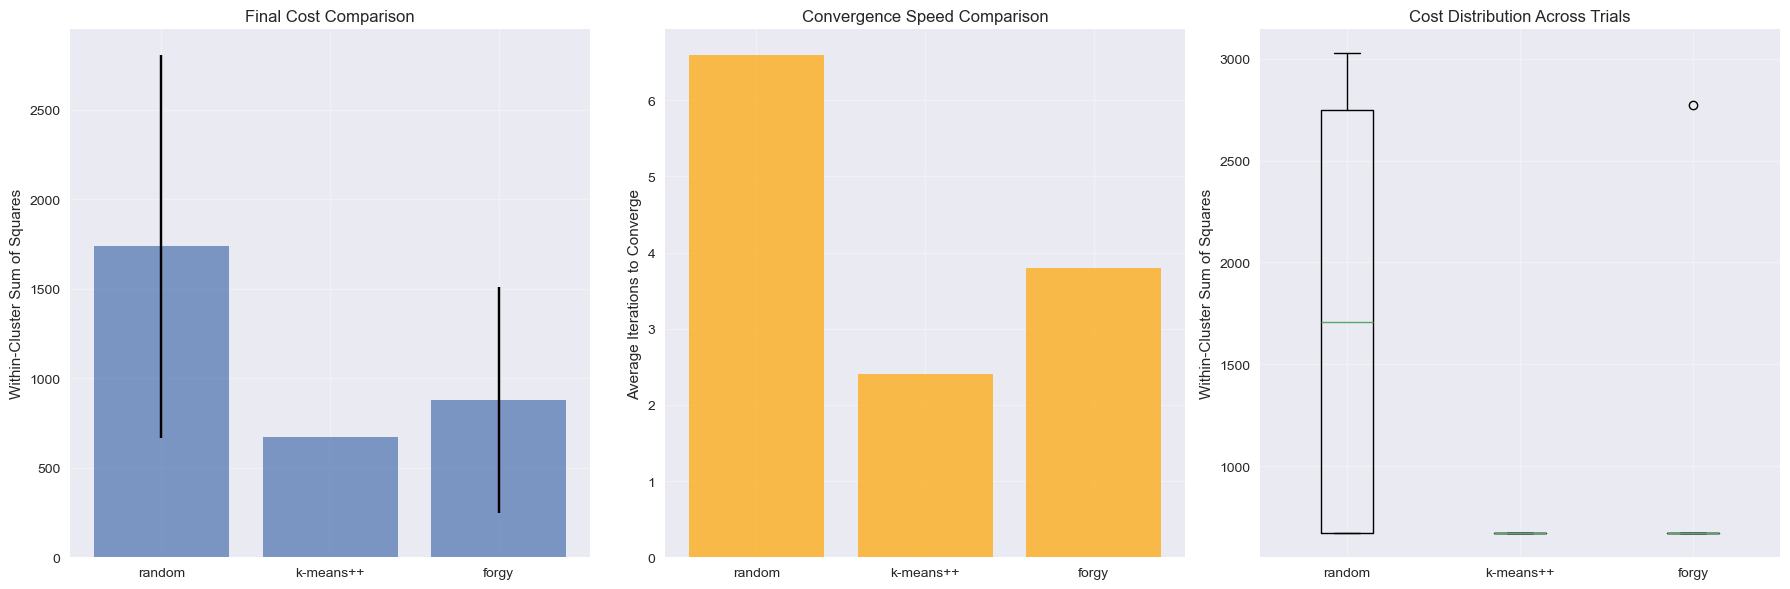


Best initialization method: random
Converged after 3 iterations


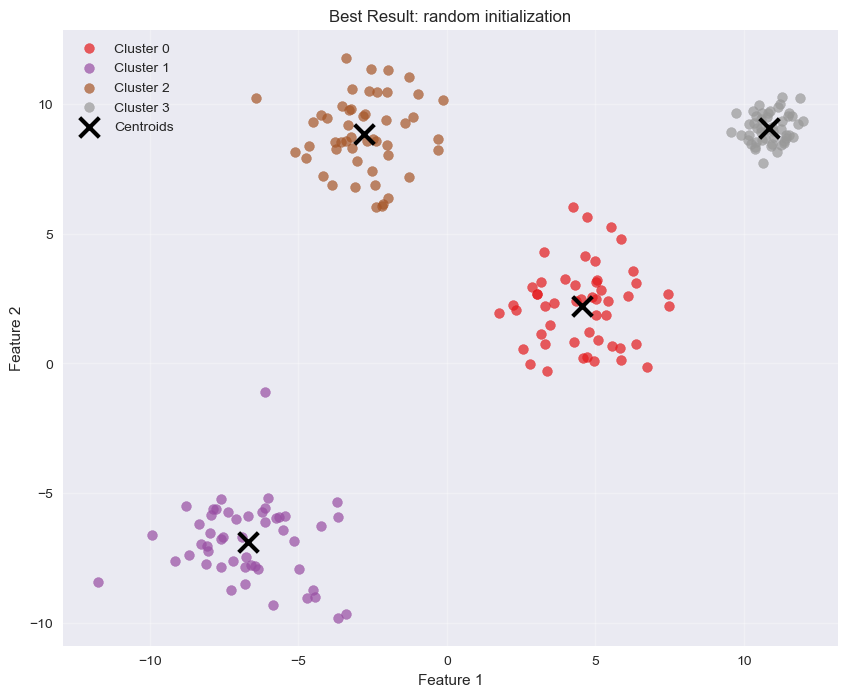

{'random': {'costs': [669.9756310941318,
   2768.8123503562824,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   2747.068798748689,
   3025.859974195598,
   2745.8962954865597,
   669.9756310941318,
   2747.403727070705],
  'iterations': [3, 10, 12, 2, 4, 5, 9, 6, 8, 7],
  'mean_cost': 1738.4919301328493,
  'std_cost': 1071.33122445868,
  'mean_iterations': 6.6,
  'best_cost': 669.9756310941318},
 'k-means++': {'costs': [669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318],
  'iterations': [2, 2, 2, 2, 2, 2, 2, 2, 4, 4],
  'mean_cost': 669.9756310941318,
  'std_cost': 0.0,
  'mean_iterations': 2.4,
  'best_cost': 669.9756310941318},
 'forgy': {'costs': [669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   669.9756310941318,
   

In [3]:
compare_initialization_methods()


EXPERIMENT 2: K-Means Algorithm Step-by-Step Demonstration
Demonstrating K-means algorithm with k=3 clusters...
Converged after 7 iterations
Algorithm converged after 7 iterations
Final cost (WCSS): 1290.35

Algorithm Progress Visualization:


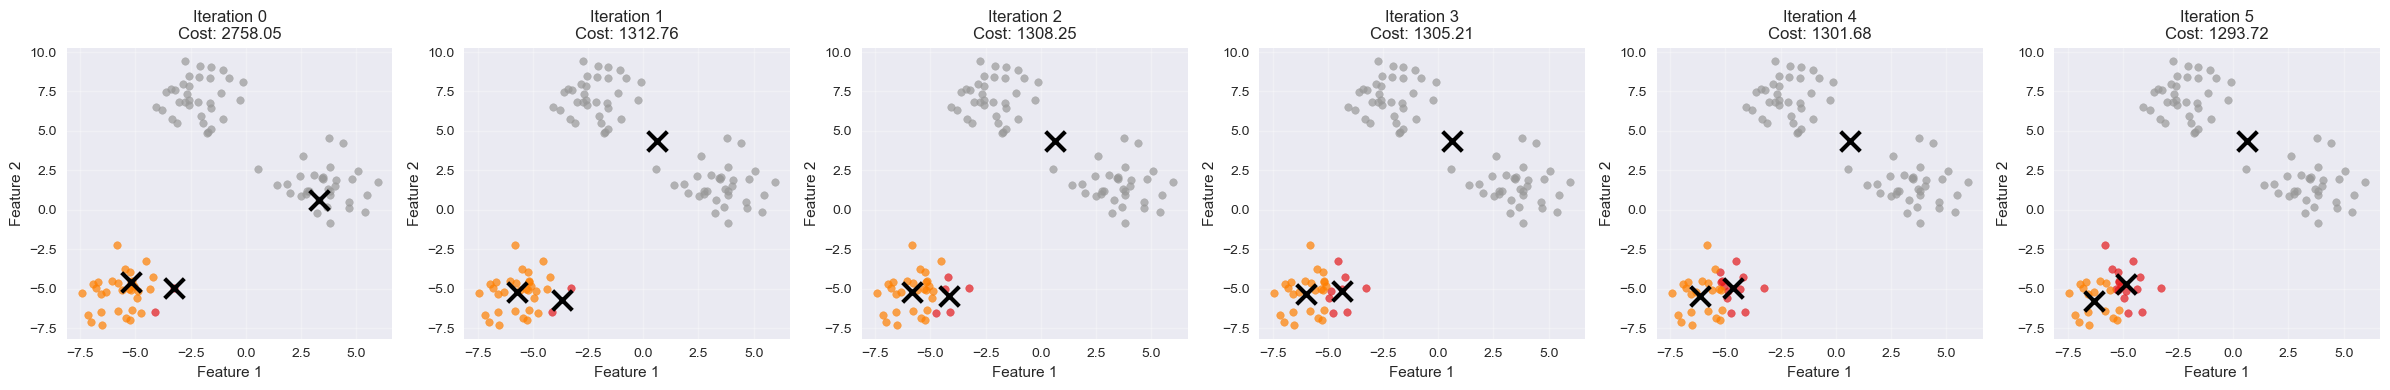

Cost Convergence:


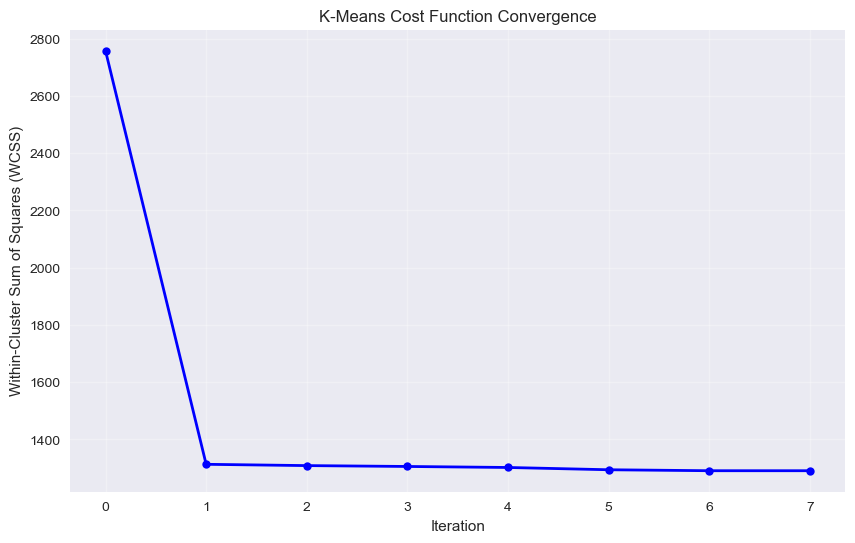

(array([[-6.51985421, -7.32190434],
        [ 4.68812373,  0.10149857],
        [-2.57072736,  7.86250095],
        [ 5.39525624, -0.10368553],
        [-5.07435692, -4.83114624],
        [ 2.52325948,  0.89897847],
        [-1.60984198,  8.38208306],
        [ 3.4482968 ,  2.00707083],
        [ 3.82839613,  2.74090974],
        [-3.38855039,  7.66226652],
        [-2.66061737,  7.34453601],
        [-5.23074983, -3.93551637],
        [-4.87737187, -5.14770607],
        [-3.33496007,  5.77598095],
        [-1.1211982 ,  7.41707084],
        [-6.78877275, -4.92512078],
        [-5.17167279, -4.51146778],
        [-2.09377024,  8.41566838],
        [-6.56433068, -5.31961755],
        [-4.9358166 , -5.59148237],
        [-2.56345933,  6.6525532 ],
        [-5.5962238 , -5.0947053 ],
        [-6.0395197 , -4.47640912],
        [-1.57368337,  9.05707278],
        [-2.05034935,  9.08900129],
        [-2.56012462,  8.47997557],
        [ 2.01345818,  1.07376136],
        [-4.75290094, -6.532

In [4]:
demonstrate_algorithm_steps()


EXPERIMENT 3: Comparing with Scikit-learn Implementation
Running our K-means implementation...
Converged after 3 iterations
Running scikit-learn K-means...

Results Comparison:
Our implementation - Final cost: 1251.35
Scikit-learn implementation - Final cost: 1251.35
Adjusted Rand Index (agreement): 1.000
Cost difference: 0.00


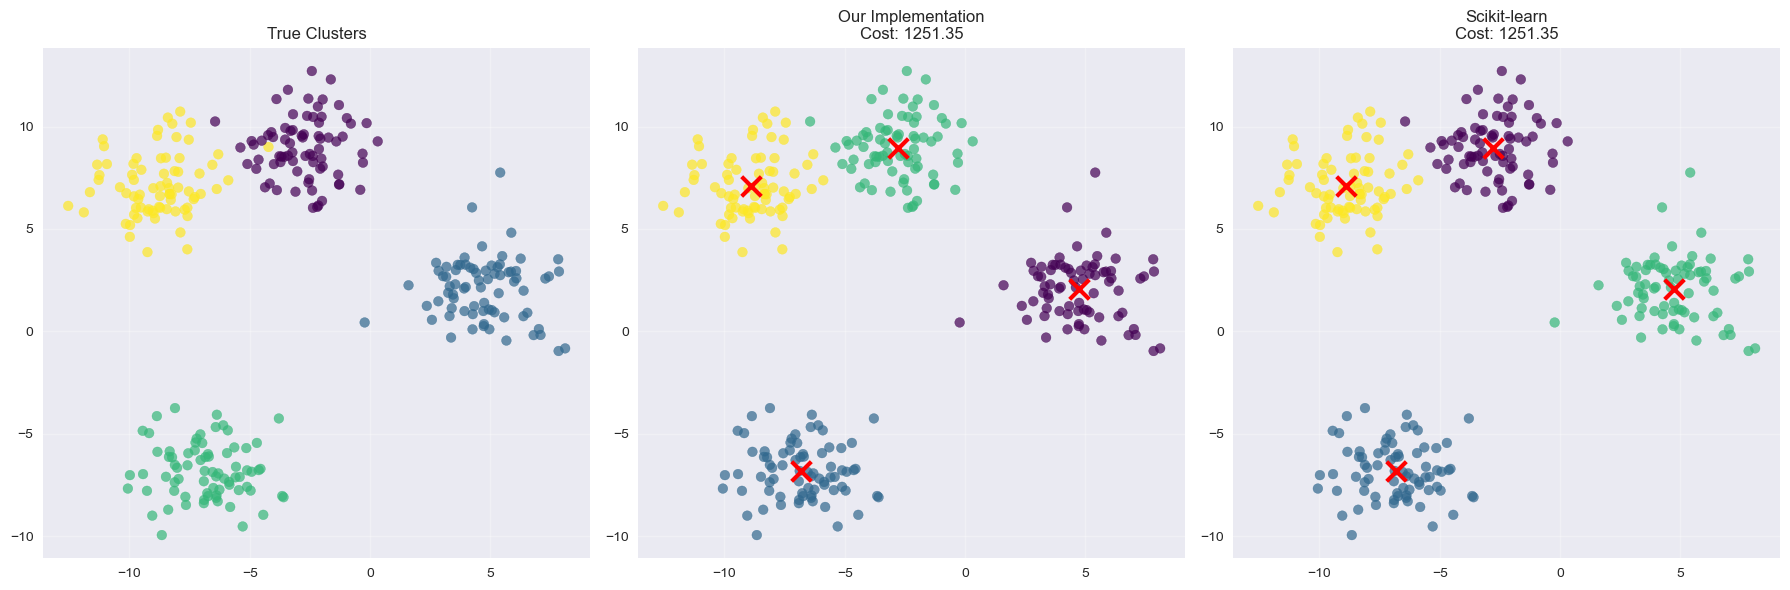

1.0

In [5]:
compare_with_sklearn()


EXPERIMENT 4: Finding Optimal Number of Clusters
Dataset has 4 true clusters. Let's see if our methods can find this...

Performing Elbow Method Analysis...
Converged after 4 iterations
Converged after 7 iterations
Converged after 5 iterations
Converged after 3 iterations
Converged after 5 iterations
Converged after 6 iterations
Converged after 4 iterations
Converged after 3 iterations
Converged after 3 iterations
Converged after 3 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 7 iterations
Converged after 4 iterations
Converged after 10 iterations
Converged after 9 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 3 iterations
Converged after 5 iterations
Converged after 9 iterations
Converged after 6 iterations
Converged after 6 iterations
Converged after 15 iterations
Converged after 5 iterations
Converged after 9 iterations
Converged after 6 iterations

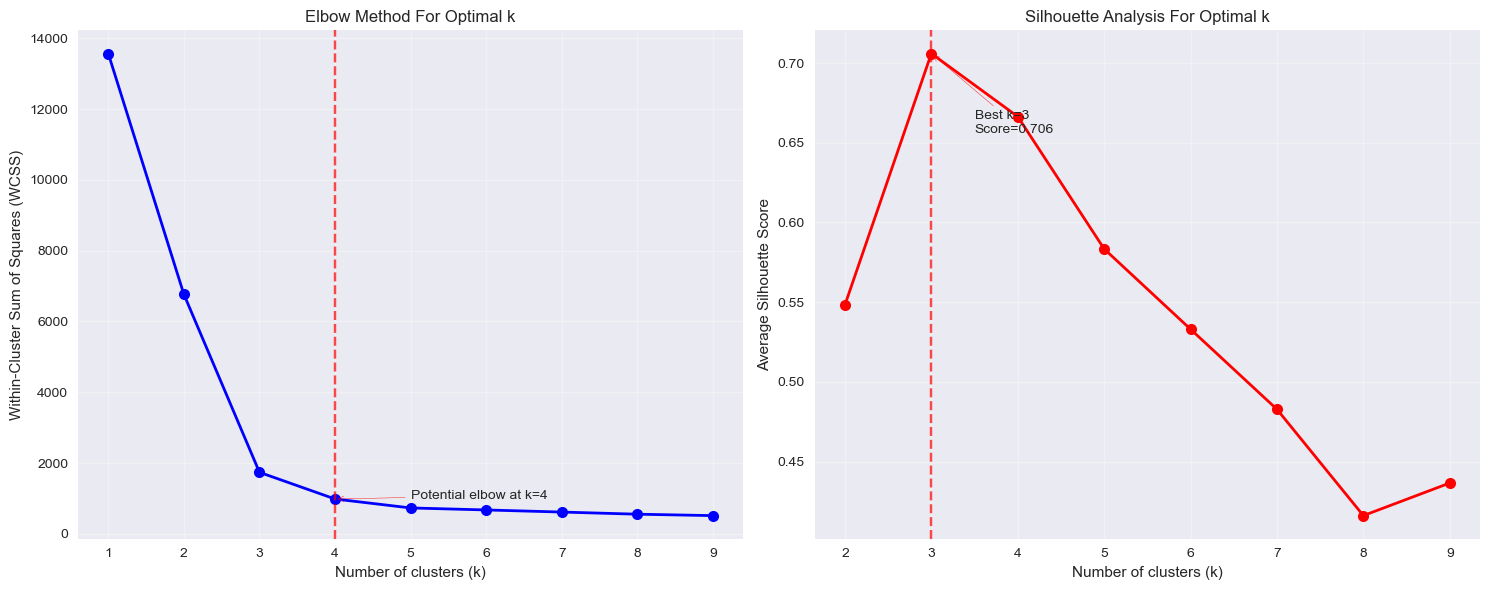


Results:
True number of clusters: 4
Elbow method suggests: k = 5
Silhouette analysis suggests: k = 3
Converged after 2 iterations


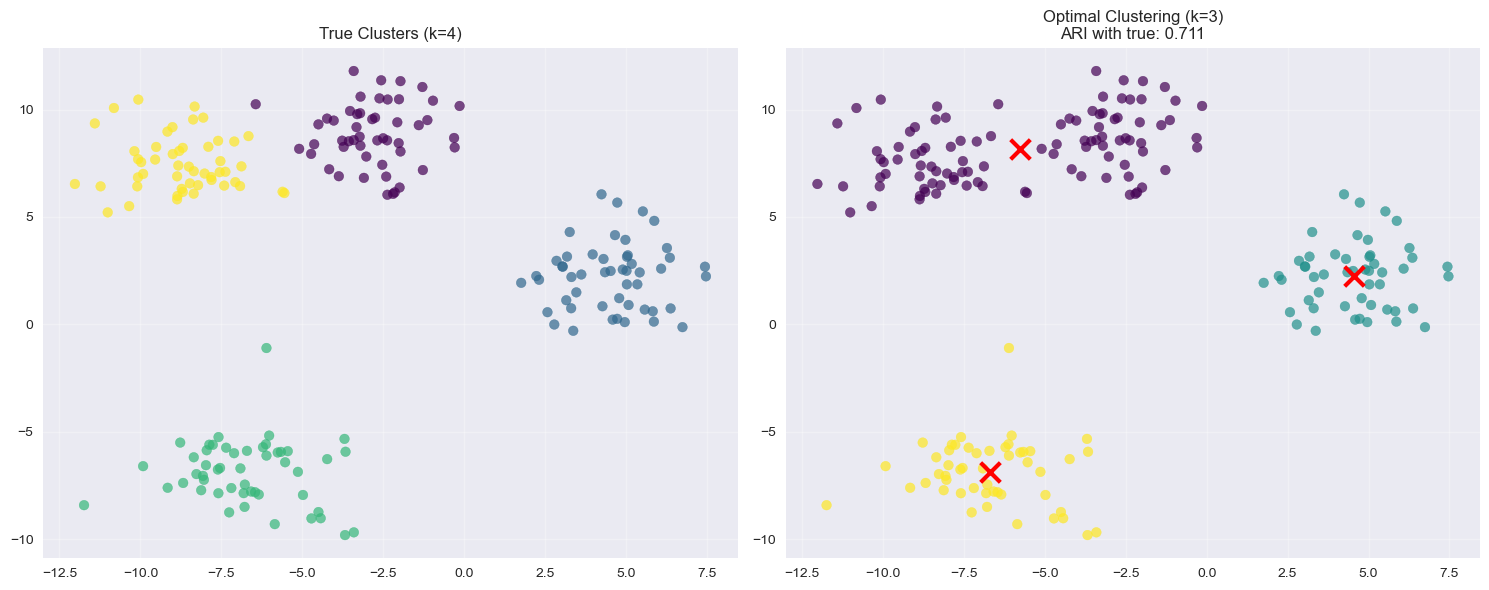

(5, 3, 0.7111756168359942)

In [6]:
find_optimal_k_demonstration()


EXPERIMENT 5: Impact of Feature Scaling
Dataset features:
Age range: 19.7 - 65.0
Income range: 18142 - 90269
Hours range: 27.6 - 55.4

Clustering with Unscaled data...
Converged after 10 iterations
  ARI with true clusters: 0.150
  Silhouette score: 0.543
  Final cost: 7205971230.04

Clustering with Standardized data...
Converged after 6 iterations
  ARI with true clusters: 0.361
  Silhouette score: 0.306
  Final cost: 263.06

Clustering with Min-Max Scaled data...
Converged after 7 iterations
  ARI with true clusters: 0.399
  Silhouette score: 0.311
  Final cost: 11.40


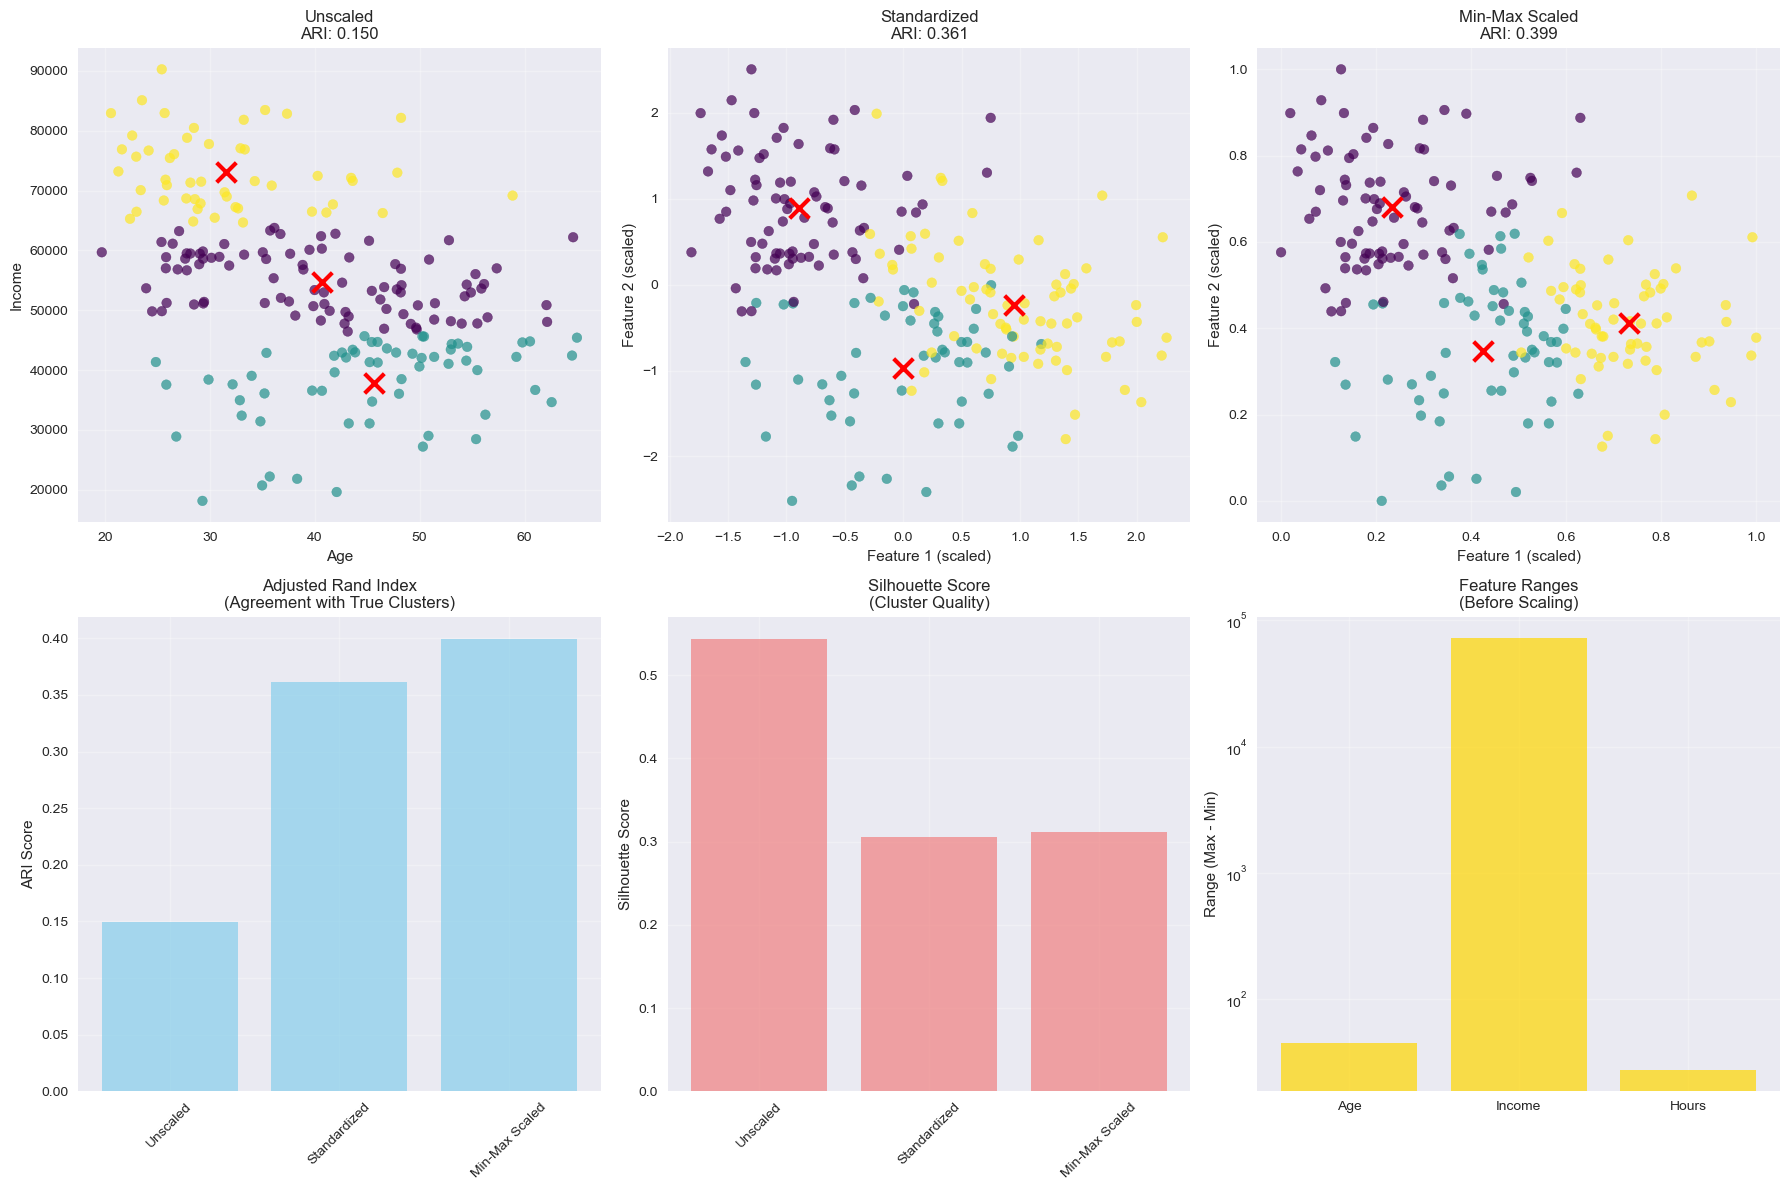


Key Insights:
1. Without scaling, income dominates due to its large range (72128 vs 45.3 for age)
2. Standardization generally provides the best clustering performance
3. Proper scaling is crucial for meaningful K-means results


{'Unscaled': {'labels': array([1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0,
         2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0,
         0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1,
         0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2,
         0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
         0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2,
         0, 2], dtype=int64),
  'centroids': array([[4.06571030e+01, 5.47750337e+04, 4.09834013e+01],
         [4.56438081e+01, 3.78480301e+04, 3.83438362e+01],
         [3.15664377e+01, 7.31807429e+04, 4.45209982e+01]]),
  'cost': 7205971230.041449,
  'ari': 0.14969479353680432,
  'silhouette': 0.5430

In [7]:
analyze_feature_scaling_impact()


EXPERIMENT 6: K-Means vs Other Clustering Algorithms

Testing on Spherical Clusters...
Converged after 3 iterations
  K-Means: ARI=0.987, Silhouette=0.697
  DBSCAN: ARI=0.705, Silhouette=0.558
  Agglomerative: ARI=0.961, Silhouette=0.696
  Gaussian Mixture: ARI=0.987, Silhouette=0.697

Testing on Circular Clusters...
Converged after 5 iterations
  K-Means: ARI=-0.004, Silhouette=0.347
  DBSCAN: ARI=0.000, Silhouette=-1.000
  Agglomerative: ARI=-0.005, Silhouette=0.339
  Gaussian Mixture: ARI=-0.005, Silhouette=0.346

Testing on Moon-shaped Clusters...
Converged after 6 iterations
  K-Means: ARI=0.460, Silhouette=0.488
  DBSCAN: ARI=0.000, Silhouette=-1.000
  Agglomerative: ARI=0.671, Silhouette=0.450
  Gaussian Mixture: ARI=0.473, Silhouette=0.488

Testing on Elongated Clusters...
Converged after 21 iterations
  K-Means: ARI=0.392, Silhouette=0.541
  DBSCAN: ARI=-0.001, Silhouette=0.393
  Agglomerative: ARI=0.421, Silhouette=0.552
  Gaussian Mixture: ARI=0.957, Silhouette=0.476


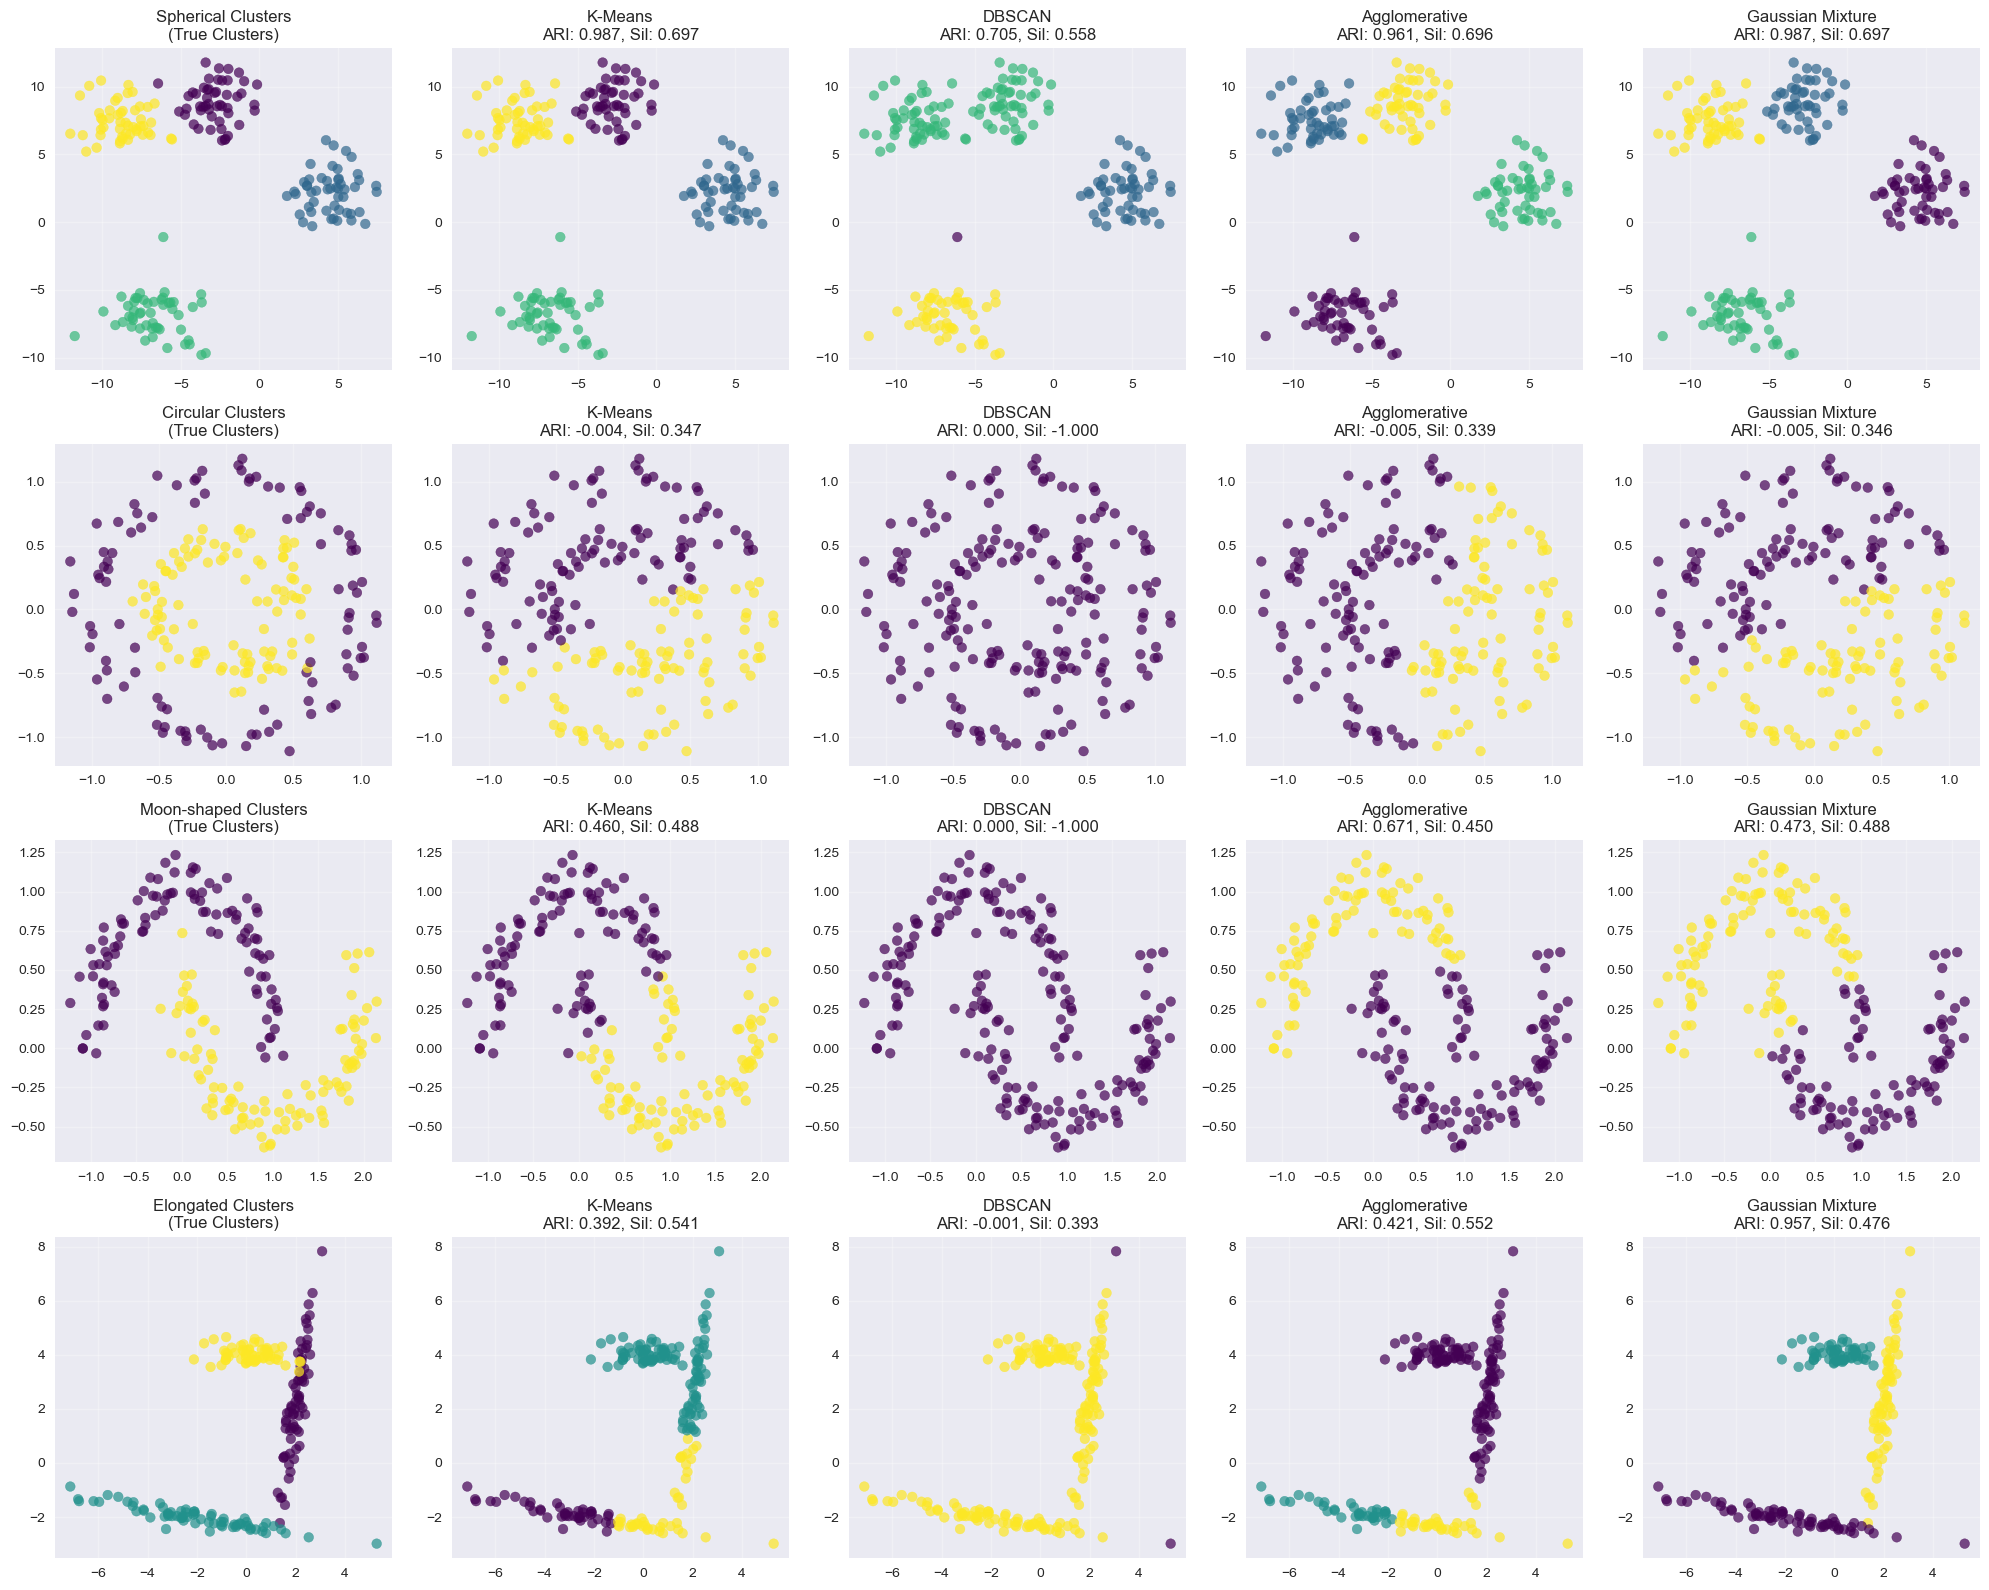


ALGORITHM PERFORMANCE SUMMARY

Spherical Clusters:
  Best algorithm: K-Means (ARI: 0.987)
  1. K-Means: ARI = 0.987
  2. Gaussian Mixture: ARI = 0.987
  3. Agglomerative: ARI = 0.961
  4. DBSCAN: ARI = 0.705

Circular Clusters:

Moon-shaped Clusters:
  Best algorithm: Agglomerative (ARI: 0.671)
  1. Agglomerative: ARI = 0.671
  2. Gaussian Mixture: ARI = 0.473
  3. K-Means: ARI = 0.460

Elongated Clusters:
  Best algorithm: Gaussian Mixture (ARI: 0.957)
  1. Gaussian Mixture: ARI = 0.957
  2. Agglomerative: ARI = 0.421
  3. K-Means: ARI = 0.392

Key Insights:
1. K-means works best on spherical, well-separated clusters
2. DBSCAN excels at irregular shapes and handles noise well
3. Gaussian Mixture Models handle overlapping clusters better
4. Agglomerative clustering is robust across different cluster shapes
5. Algorithm choice should depend on expected cluster characteristics


{'Spherical Clusters': {'K-Means': {'ari': 0.986598879940902,
   'silhouette': 0.69742489602131,
   'n_clusters': 4},
  'DBSCAN': {'ari': 0.7046661205402344,
   'silhouette': 0.5576308217535195,
   'n_clusters': 3},
  'Agglomerative': {'ari': 0.9606088289171969,
   'silhouette': 0.6963551515693137,
   'n_clusters': 4},
  'Gaussian Mixture': {'ari': 0.986598879940902,
   'silhouette': 0.69742489602131,
   'n_clusters': 4}},
 'Circular Clusters': {'K-Means': {'ari': -0.004121110134143145,
   'silhouette': 0.3465507419278318,
   'n_clusters': 2},
  'DBSCAN': {'ari': 0.0, 'silhouette': -1, 'n_clusters': 1},
  'Agglomerative': {'ari': -0.004597747588505631,
   'silhouette': 0.3385812336134806,
   'n_clusters': 2},
  'Gaussian Mixture': {'ari': -0.004630218844505858,
   'silhouette': 0.3461639208915854,
   'n_clusters': 2}},
 'Moon-shaped Clusters': {'K-Means': {'ari': 0.45968594002840396,
   'silhouette': 0.48774756181034495,
   'n_clusters': 2},
  'DBSCAN': {'ari': 0.0, 'silhouette': -1, '

In [8]:
compare_with_other_algorithms()


EXPERIMENT 7: Real-World Customer Segmentation
Generated customer dataset:
              age  annual_income  annual_spending  monthly_visits
count  500.000000     500.000000       500.000000      500.000000
mean    45.022028   52501.496855     21767.069391        4.926000
std     11.361979   17995.554799      8034.100595        2.361287
min     20.000000   16976.183773      6273.176778        0.000000
25%     36.596311   39897.697069     15959.812763        3.000000
50%     45.153566   49192.884561     20256.988252        5.000000
75%     52.641399   61277.816398     25734.772984        6.000000
max     70.000000  116446.524742     58779.141973       13.000000

Finding optimal number of customer segments...
Converged after 11 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 9 iterations
Converged after 10 iterations
Converged after 9 iterations
Converged after 7 iterations
Converged after 10 iterations
Converged after 17 iterations
Converged after 9

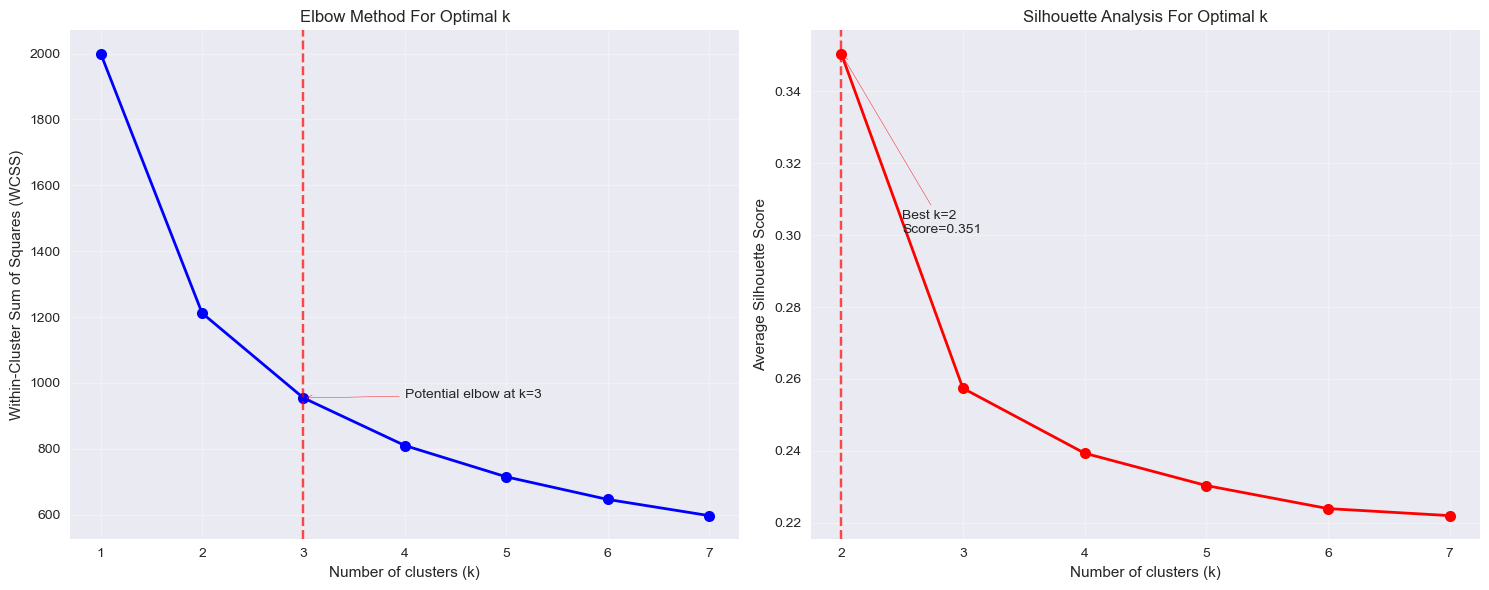

Optimal number of segments: 2
Converged after 6 iterations

Customer Segment Analysis:
           age       annual_income           annual_spending           \
          mean   std          mean       std            mean      std   
segment                                                                 
0        40.79  9.87      43060.66   9893.73        17528.15  4387.88   
1        53.02  9.56      70346.32  16255.63        29779.35  7213.73   

        monthly_visits        
                  mean   std  
segment                       
0                 4.04  1.86  
1                 6.60  2.30  


In [ ]:
real_world_example_customer_segmentation()